# **Used Cars Price Prediction**<a href="#Used-Cars-Price-Prediction" class="anchor-link">¶</a>

## **Problem Definition**<a href="#Problem-Definition" class="anchor-link">¶</a>

### **The Context:**<a href="#The-Context:" class="anchor-link">¶</a>

There is a huge demand for used cars in the Indian Market today. As
sales of new cars have slowed down in the recent past, the pre-owned car
market has continued to grow over the past few years and is now larger
than the new car market. Cars4U is a budding tech start-up that aims to
find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units,
around 4 million second-hand cars were bought and sold. There is a
slowdown in new car sales and that could mean that the demand is
shifting towards the pre-owned market. In fact, some car owners replace
their old vehicles with pre-owned cars instead of buying a new
automobile.

Unlike new cars, where price and supply are fairly deterministic and
managed by OEMs (Original Equipment Manufacturer / except for dealership
level discounts which come into play only in the last stage of the
customer journey), the used car market is a very different beast, with
large uncertainties in both pricing and supply. Several factors,
including mileage, brand, model, year, etc. can influence the actual
worth of a car. From the perspective of a seller, it is not an easy task
to set the correct price of a used car. Keeping this in mind, the
pricing scheme of these used cars becomes important in order to grow in
the market.

### **The objective:**<a href="#The-objective:" class="anchor-link">¶</a>

Come up with a pricing model that can effectively predict the price of
used cars and can help the business in devising protable strategies
using differential pricing.

### **The key questions:**<a href="#The-key-questions:" class="anchor-link">¶</a>

What are the main variables that impact the price of the car? What are
the relationships between these variables? Which is the best model for
this problem?

### **The problem formulation**:<a href="#The-problem-formulation:" class="anchor-link">¶</a>

How can we accurately calculate and set the price of used cars?

### **Data Dictionary**<a href="#Data-Dictionary" class="anchor-link">¶</a>

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is
available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the
previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel,
Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic /
Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or
km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target
Variable**)

### **Loading libraries**<a href="#Loading-libraries" class="anchor-link">¶</a>

In \[697\]:

    # import libraries for data manipulation
    import numpy as np
    import pandas as pd

    # import libraries for data visualization
    import matplotlib.pyplot as plt
    import seaborn as sns

    # import libraries for linear regression model
    from statsmodels.formula.api import ols
    import statsmodels.api as sm
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import accuracy_score

    # import library for preparing data
    from sklearn.model_selection import train_test_split

    # To ignore warnings
    import warnings
    warnings.filterwarnings('ignore')

    # Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
    pd.set_option("display.max_columns", None)

### **Let us load the data**<a href="#Let-us-load-the-data" class="anchor-link">¶</a>

In \[698\]:

    df = pd.read_csv('used_cars.csv')

## Data Overview<a href="#Data-Overview" class="anchor-link">¶</a>

-   Observations
-   Sanity checks

In \[699\]:

    #observations
    df.head()

Out\[699\]:

|     | S.No. | Name                             | Location   | Year | Kilometers_Driven | Fuel_Type | Transmission | Owner_Type | Mileage | Engine | Power  | Seats | New_price | Price |
|-----|-------|----------------------------------|------------|------|-------------------|-----------|--------------|------------|---------|--------|--------|-------|-----------|-------|
| 0   | 0     | Maruti Wagon R LXI CNG           | Mumbai     | 2010 | 72000             | CNG       | Manual       | First      | 26.60   | 998.0  | 58.16  | 5.0   | NaN       | 1.75  |
| 1   | 1     | Hyundai Creta 1.6 CRDi SX Option | Pune       | 2015 | 41000             | Diesel    | Manual       | First      | 19.67   | 1582.0 | 126.20 | 5.0   | NaN       | 12.50 |
| 2   | 2     | Honda Jazz V                     | Chennai    | 2011 | 46000             | Petrol    | Manual       | First      | 18.20   | 1199.0 | 88.70  | 5.0   | 8.61      | 4.50  |
| 3   | 3     | Maruti Ertiga VDI                | Chennai    | 2012 | 87000             | Diesel    | Manual       | First      | 20.77   | 1248.0 | 88.76  | 7.0   | NaN       | 6.00  |
| 4   | 4     | Audi A4 New 2.0 TDI Multitronic  | Coimbatore | 2013 | 40670             | Diesel    | Automatic    | Second     | 15.20   | 1968.0 | 140.80 | 5.0   | NaN       | 17.74 |

In \[700\]:

    #sanity check
    df.shape

Out\[700\]:

    (7253, 14)

In \[701\]:

    #observations
    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 7253 entries, 0 to 7252
    Data columns (total 14 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   S.No.              7253 non-null   int64  
     1   Name               7253 non-null   object 
     2   Location           7253 non-null   object 
     3   Year               7253 non-null   int64  
     4   Kilometers_Driven  7253 non-null   int64  
     5   Fuel_Type          7253 non-null   object 
     6   Transmission       7253 non-null   object 
     7   Owner_Type         7253 non-null   object 
     8   Mileage            7251 non-null   float64
     9   Engine             7207 non-null   float64
     10  Power              7078 non-null   float64
     11  Seats              7200 non-null   float64
     12  New_price          1006 non-null   float64
     13  Price              6019 non-null   float64
    dtypes: float64(6), int64(3), object(5)
    memory usage: 793.4+ KB

In \[702\]:

    #sanity check - check for # of null values for each column
    len(df.index)-df.count()

Out\[702\]:

    S.No.                   0
    Name                    0
    Location                0
    Year                    0
    Kilometers_Driven       0
    Fuel_Type               0
    Transmission            0
    Owner_Type              0
    Mileage                 2
    Engine                 46
    Power                 175
    Seats                  53
    New_price            6247
    Price                1234
    dtype: int64

In \[703\]:

    #sanity check
    df.duplicated().sum()

Out\[703\]:

    0

## Observations & Sanity Check Notes<a href="#Observations-&amp;-Sanity-Check-Notes"
class="anchor-link">¶</a>

-   There are missing values in columns 8-13
-   The New_price column has too many nulls, making it unreliable and
    will need to be removed
-   Other rows with missing values will also need to be imputed or
    removed
-   There are no duplicates

## **Exploratory Data Analysis**<a href="#Exploratory-Data-Analysis" class="anchor-link">¶</a>

-   EDA is an important part of any project involving data.
-   It is important to investigate and understand the data better before
    building a model with it.
-   A few questions have been mentioned below which will help you
    approach the analysis in the right manner and generate insights from
    the data.
-   A thorough analysis of the data, in addition to the questions
    mentioned below, should be done.

**Questions:**

1.  What is the summary statistics of the data? Explore summary
    statistics for numerical variables and the categorical variables
2.  Find out number of unique observations in each category of
    categorical columns? Write your findings/observations/insights
3.  Check the extreme values in different columns of the given data and
    write down the observtions? Remove the data where the values are
    un-realistic

In \[704\]:

    #What is the summary statistics of the data? 
    #Explore summary statistics for numerical variables and the categorical variables
    #summary statistics of data for numerical variables
    df.describe().T

Out\[704\]:

|                   | count  | mean         | std          | min     | 25%       | 50%      | 75%        | max        |
|-------------------|--------|--------------|--------------|---------|-----------|----------|------------|------------|
| S.No.             | 7253.0 | 3626.000000  | 2093.905084  | 0.00    | 1813.000  | 3626.00  | 5439.0000  | 7252.00    |
| Year              | 7253.0 | 2013.365366  | 3.254421     | 1996.00 | 2011.000  | 2014.00  | 2016.0000  | 2019.00    |
| Kilometers_Driven | 7253.0 | 58699.063146 | 84427.720583 | 171.00  | 34000.000 | 53416.00 | 73000.0000 | 6500000.00 |
| Mileage           | 7251.0 | 18.141580    | 4.562197     | 0.00    | 15.170    | 18.16    | 21.1000    | 33.54      |
| Engine            | 7207.0 | 1616.573470  | 595.285137   | 72.00   | 1198.000  | 1493.00  | 1968.0000  | 5998.00    |
| Power             | 7078.0 | 112.765214   | 53.493553    | 34.20   | 75.000    | 94.00    | 138.1000   | 616.00     |
| Seats             | 7200.0 | 5.280417     | 0.809277     | 2.00    | 5.000     | 5.00     | 5.0000     | 10.00      |
| New_price         | 1006.0 | 22.779692    | 27.759344    | 3.91    | 7.885     | 11.57    | 26.0425    | 375.00     |
| Price             | 6019.0 | 9.479468     | 11.187917    | 0.44    | 3.500     | 5.64     | 9.9500     | 160.00     |

### Observations<a href="#Observations" class="anchor-link">¶</a>

-   S.No.

    -   There are 7,253 serial numbers in the database
    -   Are these all unique or is there duplicate data?

-   Year

    -   The average year of the cars is 2013
    -   The min year is 1996 but the majority of the cars are 2011 and
        newer. This could suggest some outliers in the data.
    -   The max year is 2019
    -   Median is 2014

-   Kilometers_Driven

    -   The average km driven is \~58,699km
    -   The min is 171km
    -   The max is 6,500,000km. This may be a mistake as the \# is
        unusally high
    -   75% of the km driven is 73,000km and under, so the max is
        probably an unsual outlier or the data was miskeyed.
    -   Median is 53,416km

-   Mileage

    -   Missing data
    -   Average mileage is \~18km/kg
    -   It is odd for the min to be 0. How many cars have 0 mileage?
    -   Median is 18.16

-   Engine

    -   Missing data
    -   The range of the displacement volume of the engine is 72 and
        5,998 which is a large range in comparison to the mean
    -   The average is \~1616
    -   Median is 1,493

-   Power

    -   Missing data
    -   Average is 112
    -   Median is 94

-   Seats

    -   Missing data
    -   50% of the cars have 5 seats
    -   Min is 2, Max is 10
    -   Median is 5

-   New_price

    -   Missing data
    -   There are only 1,006 records with a new price assigned.
    -   This variable is unusable

-   Price

    -   Missing data
    -   The average price of used cars is \~948,000 INR
    -   The range is 44,000 INR and 16,000,000 INR
    -   The average is \~.05% of the max price. The max could have been
        miskeyed.
    -   75% of the are prices are 995,000 INR and under.
    -   Median is 563,000 INR

In \[705\]:

    #What is the summary statistics of the data? 
    #Explore summary statistics for numerical variables and the categorical variables
    #summary statistics of data for categorical variables

    # Make list for categorical variables
    cat_vars = ["Name", "Location", "Fuel_Type", "Transmission", "Owner_Type", "Year", "Seats"]

    # Print count of unique value in each column
    for column in cat_vars:
        print(df[column].value_counts())
        print("-" * 50)

    Name
    Mahindra XUV500 W8 2WD                  55
    Maruti Swift VDI                        49
    Maruti Swift Dzire VDI                  42
    Honda City 1.5 S MT                     39
    Maruti Swift VDI BSIV                   37
                                            ..
    Chevrolet Beat LT Option                 1
    Skoda Rapid 1.6 MPI AT Elegance Plus     1
    Ford EcoSport 1.5 TDCi Ambiente          1
    Hyundai i10 Magna 1.1 iTech SE           1
    Hyundai Elite i20 Magna Plus             1
    Name: count, Length: 2041, dtype: int64
    --------------------------------------------------
    Location
    Mumbai        949
    Hyderabad     876
    Coimbatore    772
    Kochi         772
    Pune          765
    Delhi         660
    Kolkata       654
    Chennai       591
    Jaipur        499
    Bangalore     440
    Ahmedabad     275
    Name: count, dtype: int64
    --------------------------------------------------
    Fuel_Type
    Diesel      3852
    Petrol      3325
    CNG           62
    LPG           12
    Electric       2
    Name: count, dtype: int64
    --------------------------------------------------
    Transmission
    Manual       5204
    Automatic    2049
    Name: count, dtype: int64
    --------------------------------------------------
    Owner_Type
    First             5952
    Second            1152
    Third              137
    Fourth & Above      12
    Name: count, dtype: int64
    --------------------------------------------------
    Year
    2015    929
    2014    925
    2016    886
    2013    791
    2017    709
    2012    690
    2011    579
    2010    407
    2018    361
    2009    252
    2008    207
    2007    148
    2019    119
    2006     89
    2005     68
    2004     35
    2003     20
    2002     18
    2001      8
    2000      5
    1998      4
    1999      2
    1996      1
    Name: count, dtype: int64
    --------------------------------------------------
    Seats
    5.0     6048
    7.0      796
    8.0      170
    4.0      119
    6.0       38
    2.0       18
    10.0       8
    9.0        3
    Name: count, dtype: int64
    --------------------------------------------------

In \[706\]:

    # Print count by % of unique value in each column
    for column in cat_vars:
        print(df[column].value_counts(normalize=True))
        print("-" * 50)

    Name
    Mahindra XUV500 W8 2WD                  0.007583
    Maruti Swift VDI                        0.006756
    Maruti Swift Dzire VDI                  0.005791
    Honda City 1.5 S MT                     0.005377
    Maruti Swift VDI BSIV                   0.005101
                                              ...   
    Chevrolet Beat LT Option                0.000138
    Skoda Rapid 1.6 MPI AT Elegance Plus    0.000138
    Ford EcoSport 1.5 TDCi Ambiente         0.000138
    Hyundai i10 Magna 1.1 iTech SE          0.000138
    Hyundai Elite i20 Magna Plus            0.000138
    Name: proportion, Length: 2041, dtype: float64
    --------------------------------------------------
    Location
    Mumbai        0.130842
    Hyderabad     0.120778
    Coimbatore    0.106439
    Kochi         0.106439
    Pune          0.105474
    Delhi         0.090997
    Kolkata       0.090170
    Chennai       0.081484
    Jaipur        0.068799
    Bangalore     0.060665
    Ahmedabad     0.037915
    Name: proportion, dtype: float64
    --------------------------------------------------
    Fuel_Type
    Diesel      0.531091
    Petrol      0.458431
    CNG         0.008548
    LPG         0.001654
    Electric    0.000276
    Name: proportion, dtype: float64
    --------------------------------------------------
    Transmission
    Manual       0.717496
    Automatic    0.282504
    Name: proportion, dtype: float64
    --------------------------------------------------
    Owner_Type
    First             0.820626
    Second            0.158831
    Third             0.018889
    Fourth & Above    0.001654
    Name: proportion, dtype: float64
    --------------------------------------------------
    Year
    2015    0.128085
    2014    0.127533
    2016    0.122156
    2013    0.109058
    2017    0.097753
    2012    0.095133
    2011    0.079829
    2010    0.056115
    2018    0.049773
    2009    0.034744
    2008    0.028540
    2007    0.020405
    2019    0.016407
    2006    0.012271
    2005    0.009375
    2004    0.004826
    2003    0.002757
    2002    0.002482
    2001    0.001103
    2000    0.000689
    1998    0.000551
    1999    0.000276
    1996    0.000138
    Name: proportion, dtype: float64
    --------------------------------------------------
    Seats
    5.0     0.840000
    7.0     0.110556
    8.0     0.023611
    4.0     0.016528
    6.0     0.005278
    2.0     0.002500
    10.0    0.001111
    9.0     0.000417
    Name: proportion, dtype: float64
    --------------------------------------------------

### Observations<a href="#Observations" class="anchor-link">¶</a>

-   Name has 2041 unique values. This will need to be broken out by
    Brand and Model separately.
-   The top 5 Locations make up \~57% of the used car market
-   The top 7 locations make up \~75%
-   Fuel Type of cars are mainly Diesel and Petrol
-   Transmission of cars is mostly manual but there is still a
    significant amount of Automatic cars
-   Owner Type is mostly First (82%) and then Second (15.9%)
-   Majority of used cars are 2011 and newer (\~70%)
-   84% percent of the cars have 5 seats

In \[707\]:

    df.nunique()

Out\[707\]:

    S.No.                7253
    Name                 2041
    Location               11
    Year                   23
    Kilometers_Driven    3660
    Fuel_Type               5
    Transmission            2
    Owner_Type              4
    Mileage               438
    Engine                150
    Power                 383
    Seats                   8
    New_price             625
    Price                1373
    dtype: int64

### Observations<a href="#Observations" class="anchor-link">¶</a>

-   There are 7253 unique serial #'s in the dataset
-   There are way too many unique values for Name since it's a
    categorical variable
-   I was expecting the numerical variables to have closer to 6k unique
    values since there are 7k unique cars, so it is interesting that the
    counts are much lower. These cars seems to share a lot of the same
    specs.
-   There are 23 years which make sense since the years range from 1996
    to 2019

In \[708\]:

    # Checking for extreme values for KM Driven
    sns.boxplot(data=df,x='Kilometers_Driven')
    plt.show()

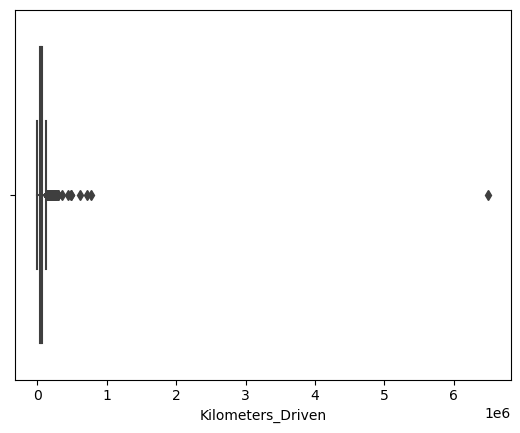

-   The max value of KM Driven is a very unrealistic outlier
    (6,500,000km)
-   This will need to be removed from the data

In \[709\]:

    # Checking for extreme values for Mileage
    sns.boxplot(data=df,x='Mileage')
    plt.show()

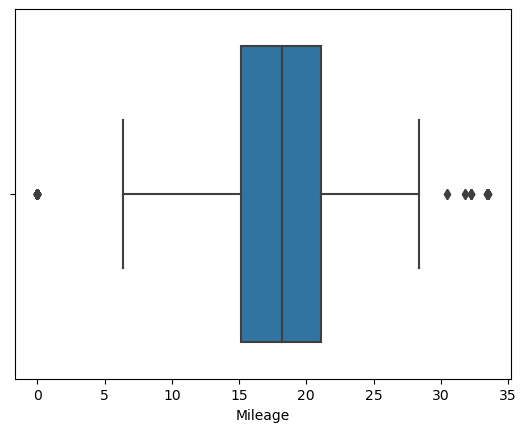

-   Mileage of 0 is unrealistic and will need to be removed or imputed

In \[710\]:

    # Checking for extreme values for Price
    sns.boxplot(data=df,x='Price')
    plt.show()

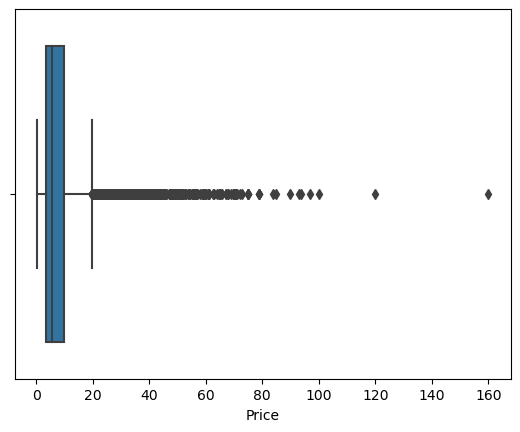

-   The max of 16,000,000 INR seemed unrealistic when looking at the
    summary statistics, but looking at the boxplot and thinking of how
    expensive cars can be, it could be feasible.

In \[711\]:

    # Checking car info for max price plot
    df.iloc[df.Price.idxmax()]

Out\[711\]:

    S.No.                                                       4079
    Name                 Land Rover Range Rover 3.0 Diesel LWB Vogue
    Location                                               Hyderabad
    Year                                                        2017
    Kilometers_Driven                                          25000
    Fuel_Type                                                 Diesel
    Transmission                                           Automatic
    Owner_Type                                                 First
    Mileage                                                    13.33
    Engine                                                    2993.0
    Power                                                      255.0
    Seats                                                        5.0
    New_price                                                  230.0
    Price                                                      160.0
    Name: 4079, dtype: object

-   Price seems to be realistic for car brand/model, so I will not be
    removing outliers for Price

## Removing unrealistic values<a href="#Removing-unrealistic-values" class="anchor-link">¶</a>

In \[712\]:

    # Looking for Record of KM Drive outlier
    df.sort_values(by='Kilometers_Driven', ascending=False).head(10)

Out\[712\]:

|      | S.No. | Name                                            | Location  | Year | Kilometers_Driven | Fuel_Type | Transmission | Owner_Type | Mileage | Engine | Power  | Seats | New_price | Price |
|------|-------|-------------------------------------------------|-----------|------|-------------------|-----------|--------------|------------|---------|--------|--------|-------|-----------|-------|
| 2328 | 2328  | BMW X5 xDrive 30d M Sport                       | Chennai   | 2017 | 6500000           | Diesel    | Automatic    | First      | 15.97   | 2993.0 | 258.00 | 5.0   | NaN       | 65.00 |
| 340  | 340   | Skoda Octavia Ambition Plus 2.0 TDI AT          | Kolkata   | 2013 | 775000            | Diesel    | Automatic    | First      | 19.30   | 1968.0 | 141.00 | 5.0   | NaN       | 7.50  |
| 1860 | 1860  | Volkswagen Vento Diesel Highline                | Chennai   | 2013 | 720000            | Diesel    | Manual       | First      | 20.54   | 1598.0 | 103.60 | 5.0   | NaN       | 5.90  |
| 358  | 358   | Hyundai i10 Magna 1.2                           | Chennai   | 2009 | 620000            | Petrol    | Manual       | First      | 20.36   | 1197.0 | 78.90  | 5.0   | NaN       | 2.70  |
| 2823 | 2823  | Volkswagen Jetta 2013-2015 2.0L TDI Highline AT | Chennai   | 2015 | 480000            | Diesel    | Automatic    | First      | 16.96   | 1968.0 | 138.03 | 5.0   | NaN       | 13.00 |
| 3092 | 3092  | Honda City i VTEC SV                            | Kolkata   | 2015 | 480000            | Petrol    | Manual       | First      | 17.40   | 1497.0 | 117.30 | 5.0   | NaN       | 5.00  |
| 4491 | 4491  | Hyundai i20 Magna Optional 1.2                  | Bangalore | 2013 | 445000            | Petrol    | Manual       | First      | 18.50   | 1197.0 | 82.90  | 5.0   | NaN       | 4.45  |
| 6921 | 6921  | Maruti Swift Dzire Tour LDI                     | Jaipur    | 2012 | 350000            | Diesel    | Manual       | First      | 23.40   | 1248.0 | 74.00  | 5.0   | NaN       | NaN   |
| 3649 | 3649  | Tata Indigo LS                                  | Jaipur    | 2008 | 300000            | Diesel    | Manual       | First      | 17.00   | 1405.0 | 70.00  | 5.0   | NaN       | 1.00  |
| 1528 | 1528  | Toyota Innova 2.5 G (Diesel) 8 Seater BS IV     | Hyderabad | 2005 | 299322            | Diesel    | Manual       | First      | 12.80   | 2494.0 | 102.00 | 8.0   | NaN       | 4.00  |

In \[713\]:

    # Removing 6,500,000km from KM Driven

    df.drop([2328], inplace=True)

In \[714\]:

    # Checking to make sure it was dropped

    df.sort_values(by='Kilometers_Driven', ascending=False).head(10)

Out\[714\]:

|      | S.No. | Name                                            | Location  | Year | Kilometers_Driven | Fuel_Type | Transmission | Owner_Type | Mileage | Engine | Power  | Seats | New_price | Price |
|------|-------|-------------------------------------------------|-----------|------|-------------------|-----------|--------------|------------|---------|--------|--------|-------|-----------|-------|
| 340  | 340   | Skoda Octavia Ambition Plus 2.0 TDI AT          | Kolkata   | 2013 | 775000            | Diesel    | Automatic    | First      | 19.30   | 1968.0 | 141.00 | 5.0   | NaN       | 7.50  |
| 1860 | 1860  | Volkswagen Vento Diesel Highline                | Chennai   | 2013 | 720000            | Diesel    | Manual       | First      | 20.54   | 1598.0 | 103.60 | 5.0   | NaN       | 5.90  |
| 358  | 358   | Hyundai i10 Magna 1.2                           | Chennai   | 2009 | 620000            | Petrol    | Manual       | First      | 20.36   | 1197.0 | 78.90  | 5.0   | NaN       | 2.70  |
| 2823 | 2823  | Volkswagen Jetta 2013-2015 2.0L TDI Highline AT | Chennai   | 2015 | 480000            | Diesel    | Automatic    | First      | 16.96   | 1968.0 | 138.03 | 5.0   | NaN       | 13.00 |
| 3092 | 3092  | Honda City i VTEC SV                            | Kolkata   | 2015 | 480000            | Petrol    | Manual       | First      | 17.40   | 1497.0 | 117.30 | 5.0   | NaN       | 5.00  |
| 4491 | 4491  | Hyundai i20 Magna Optional 1.2                  | Bangalore | 2013 | 445000            | Petrol    | Manual       | First      | 18.50   | 1197.0 | 82.90  | 5.0   | NaN       | 4.45  |
| 6921 | 6921  | Maruti Swift Dzire Tour LDI                     | Jaipur    | 2012 | 350000            | Diesel    | Manual       | First      | 23.40   | 1248.0 | 74.00  | 5.0   | NaN       | NaN   |
| 3649 | 3649  | Tata Indigo LS                                  | Jaipur    | 2008 | 300000            | Diesel    | Manual       | First      | 17.00   | 1405.0 | 70.00  | 5.0   | NaN       | 1.00  |
| 1528 | 1528  | Toyota Innova 2.5 G (Diesel) 8 Seater BS IV     | Hyderabad | 2005 | 299322            | Diesel    | Manual       | First      | 12.80   | 2494.0 | 102.00 | 8.0   | NaN       | 4.00  |
| 6919 | 6919  | ISUZU D-MAX V-Cross 4X4                         | Jaipur    | 2017 | 290000            | Diesel    | Manual       | First      | 12.40   | 2499.0 | 134.00 | 5.0   | NaN       | NaN   |

## **Univariate Analysis**<a href="#Univariate-Analysis" class="anchor-link">¶</a>

**Questions:**

1.  Do univariate analysis for numerical and categorical variables?
2.  Check the distribution of the different variables? is the
    distributions skewed?
3.  Do we need to do log_transformation, if so for what variables we
    need to do?
4.  Perfoem the log_transformation(if needed) and write down your
    observations?

In \[715\]:

    # Univariate analysis for categorical variables

    fig, axes = plt.subplots(2,2, figsize = (18, 10))

    fig.suptitle('Bar plot for all categorical variables in the dataset')

    sns.countplot(ax = axes[0, 0], x = 'Name', data = df, color = 'blue',
                  order = df['Name'].value_counts().index);

    sns.countplot(ax = axes[0, 1], x = 'Location', data = df, color = 'blue',
                  order = df['Location'].value_counts().index);

    sns.countplot(ax = axes[1, 0], x = 'Fuel_Type', data = df, color = 'blue',
                  order = df['Fuel_Type'].value_counts().index);

    sns.countplot(ax = axes[1, 1], x = 'Transmission', data = df, color = 'blue',
                  order = df['Transmission'].value_counts().index);

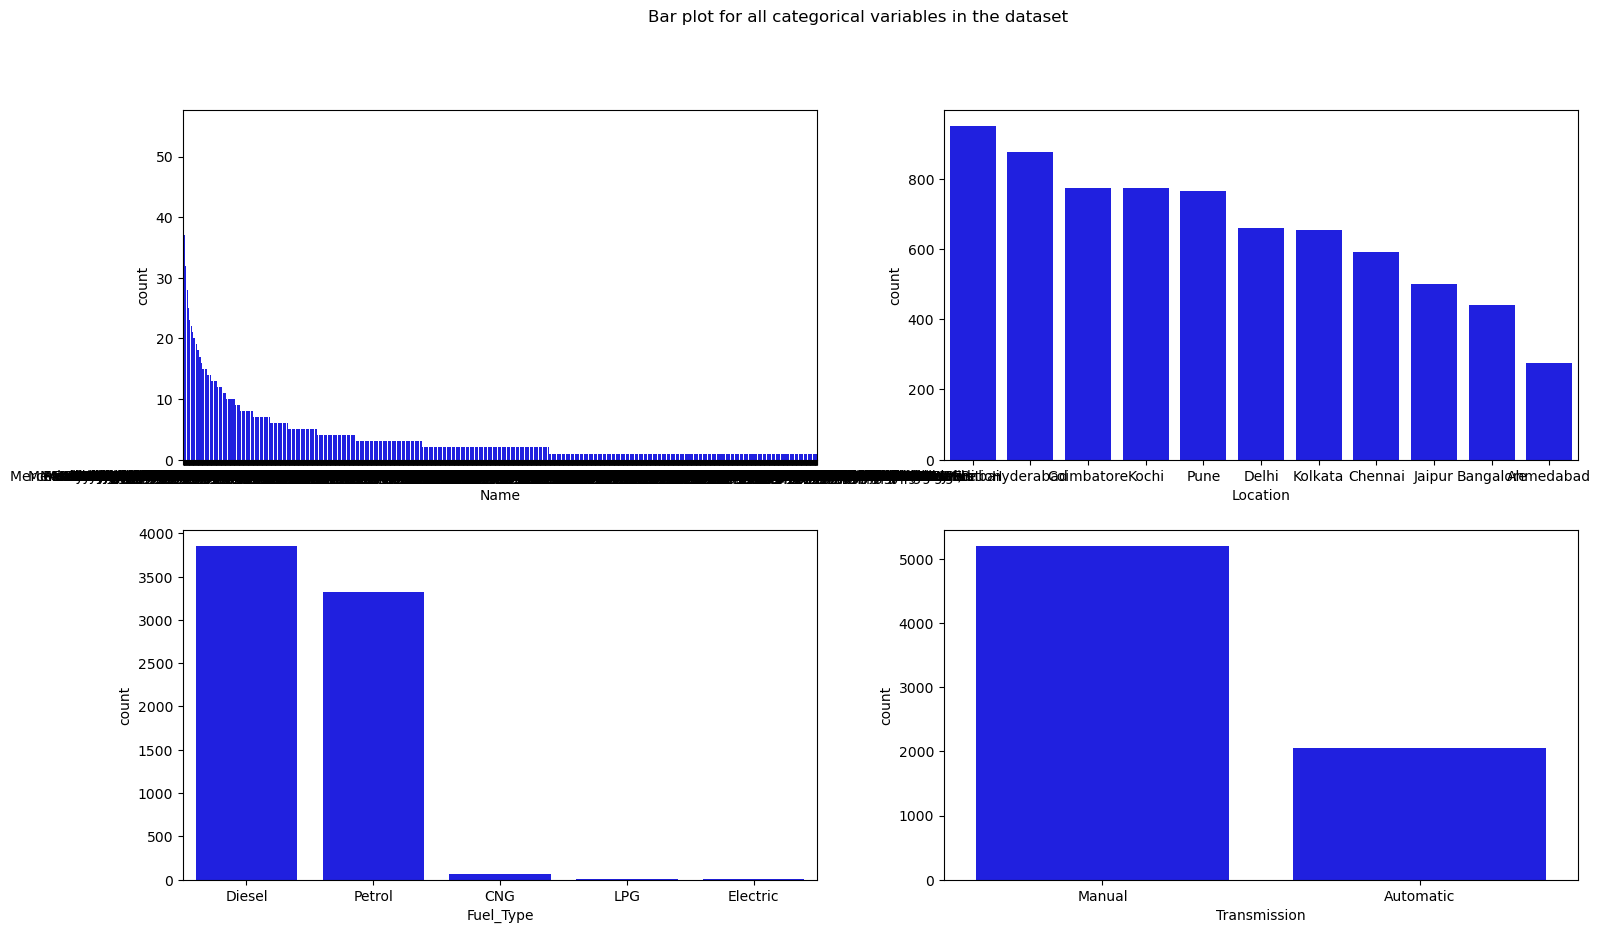

In \[716\]:

    # Univariate analysis for Owner Type

    fig = plt.figure(figsize = (18, 6))

    sns.countplot(x = 'Owner_Type', data = df, color = 'blue', order = df['Owner_Type'].value_counts().index);

    plt.xticks(rotation = 45);

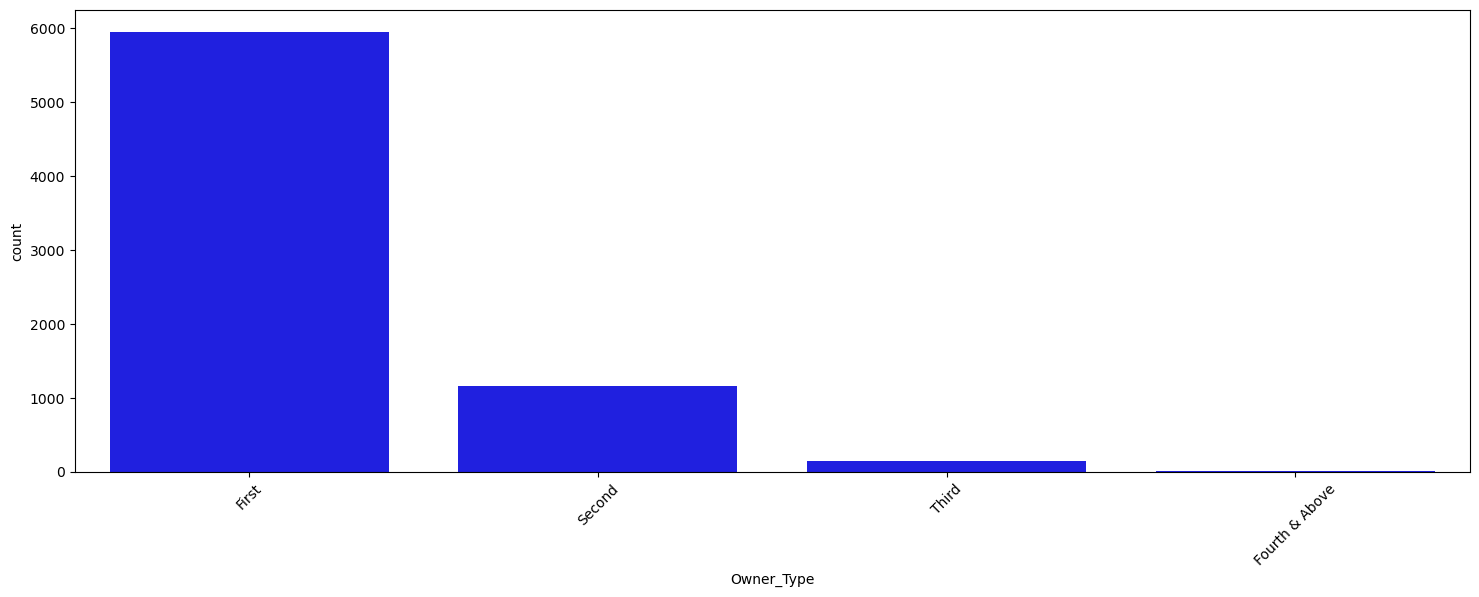

In \[717\]:

    # Univariate analysis for Year

    sns.countplot(x = 'Year', data = df, color = 'blue');

    plt.xticks(rotation = 45);

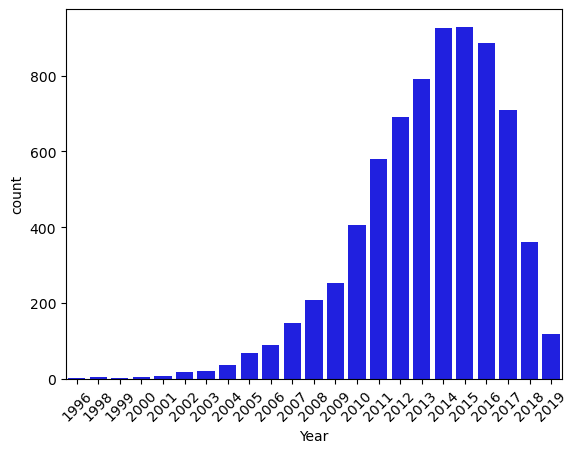

In \[718\]:

    # Univariate analysis for Seats

    sns.countplot(x = 'Seats', data = df, color = 'blue', order = df['Seats'].value_counts().index);

    plt.xticks(rotation = 45);

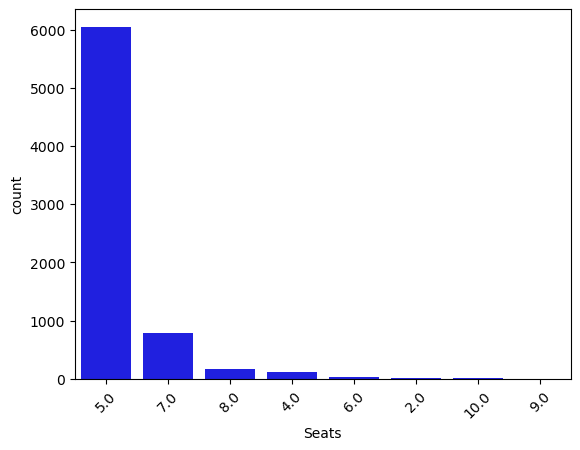

In \[719\]:

    # Univariate analysis for numerical variables

    fig, axes = plt.subplots(1, 5, figsize = (20, 6))

    fig.suptitle('Histogram for all numerical variables in the dataset')

    sns.histplot(x = 'Kilometers_Driven', data = df, kde = True, ax = axes[0]);

    sns.histplot(x = 'Mileage', data = df, kde = True, ax = axes[1]);

    sns.histplot(x = 'Engine', data = df, kde = True, ax = axes[2]);

    sns.histplot(x = 'Power', data = df, kde = True, ax = axes[3]);

    sns.histplot(x = 'Price', data = df, kde = True, ax = axes[4]);

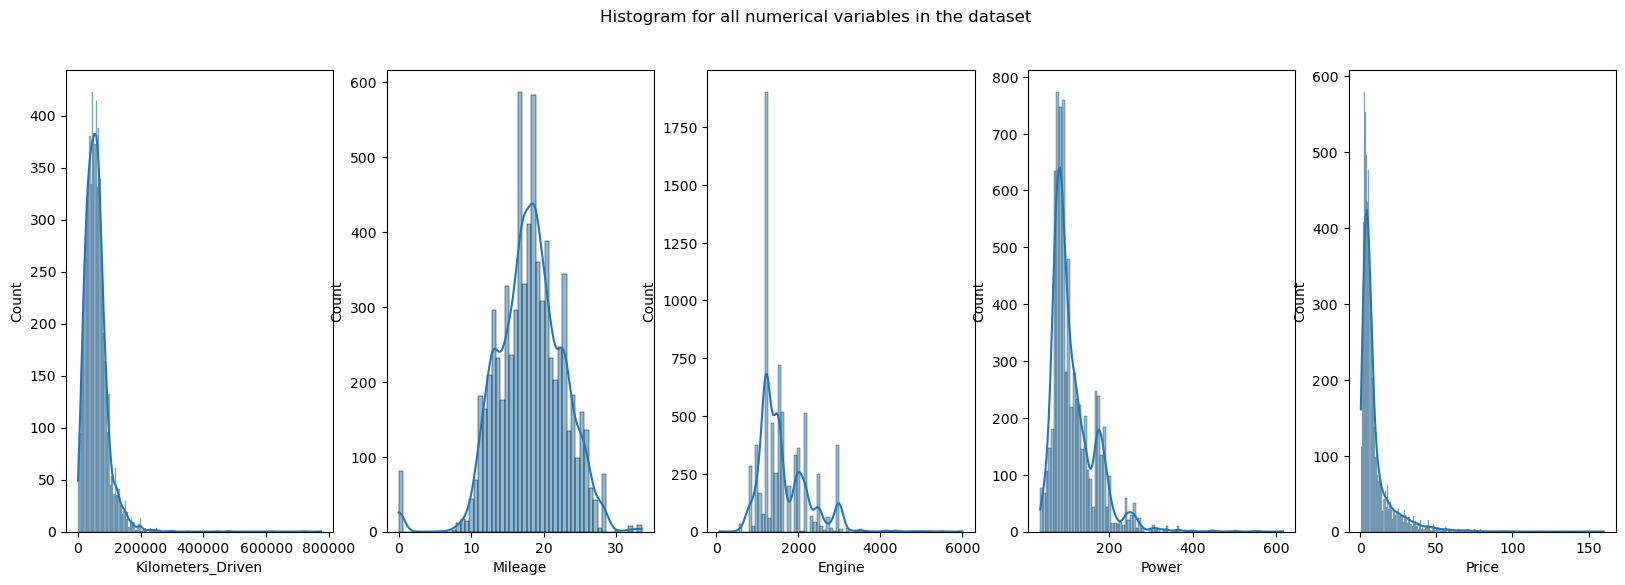

-   KM Driven is right skewed
-   Mileage is a multimodal normal distribution
-   Engine is right skewed and multimodal
-   Power is right skewed and bimodal
-   Price is right skewed
-   log_transformation needs to be done for dependent variables: KM
    driven and price since they're right skewed

In \[720\]:

    # Log transformation of Kilometers_Driven variable 
    df['KM_Log'] = np.log(df['Kilometers_Driven'])


    # Plotting Engine_New to look at distribution 
    sns.histplot(data=df, x='KM_Log', kde=True)

Out\[720\]:

    <Axes: xlabel='KM_Log', ylabel='Count'>

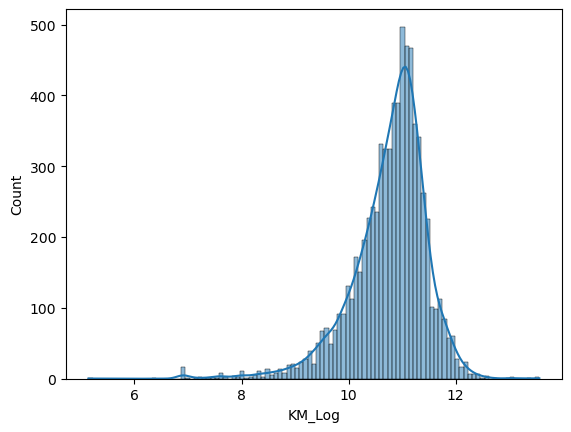

In \[721\]:

    # Log transformation of Price variable 
    df['Price_Log'] = np.log(df['Price'])

    # Plotting Engine_New to look at distribution 
    sns.histplot(data=df, x='Price_Log', kde=True)

Out\[721\]:

    <Axes: xlabel='Price_Log', ylabel='Count'>

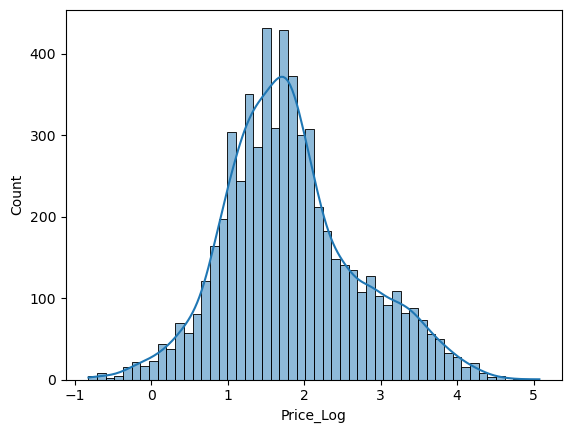

In \[722\]:

    # Checking log columns

    df.head()

Out\[722\]:

|     | S.No. | Name                             | Location   | Year | Kilometers_Driven | Fuel_Type | Transmission | Owner_Type | Mileage | Engine | Power  | Seats | New_price | Price | KM_Log    | Price_Log |
|-----|-------|----------------------------------|------------|------|-------------------|-----------|--------------|------------|---------|--------|--------|-------|-----------|-------|-----------|-----------|
| 0   | 0     | Maruti Wagon R LXI CNG           | Mumbai     | 2010 | 72000             | CNG       | Manual       | First      | 26.60   | 998.0  | 58.16  | 5.0   | NaN       | 1.75  | 11.184421 | 0.559616  |
| 1   | 1     | Hyundai Creta 1.6 CRDi SX Option | Pune       | 2015 | 41000             | Diesel    | Manual       | First      | 19.67   | 1582.0 | 126.20 | 5.0   | NaN       | 12.50 | 10.621327 | 2.525729  |
| 2   | 2     | Honda Jazz V                     | Chennai    | 2011 | 46000             | Petrol    | Manual       | First      | 18.20   | 1199.0 | 88.70  | 5.0   | 8.61      | 4.50  | 10.736397 | 1.504077  |
| 3   | 3     | Maruti Ertiga VDI                | Chennai    | 2012 | 87000             | Diesel    | Manual       | First      | 20.77   | 1248.0 | 88.76  | 7.0   | NaN       | 6.00  | 11.373663 | 1.791759  |
| 4   | 4     | Audi A4 New 2.0 TDI Multitronic  | Coimbatore | 2013 | 40670             | Diesel    | Automatic    | Second     | 15.20   | 1968.0 | 140.80 | 5.0   | NaN       | 17.74 | 10.613246 | 2.875822  |

## **Bivariate Analysis**<a href="#Bivariate-Analysis" class="anchor-link">¶</a>

**Questions:**

1.  Plot a scatter plot for the log transformed values(if
    log_transformation done in previous steps)?
2.  What can we infer form the correlation heatmap? Is there correlation
    between the dependent and independent variables?
3.  Plot a box plot for target variable and categorical variable
    'Location' and write your observations?

In \[723\]:

    # Scatterplot between price_log and location
    sns.scatterplot(x = 'Price_Log', y = 'Location', data = df)
    plt.show()

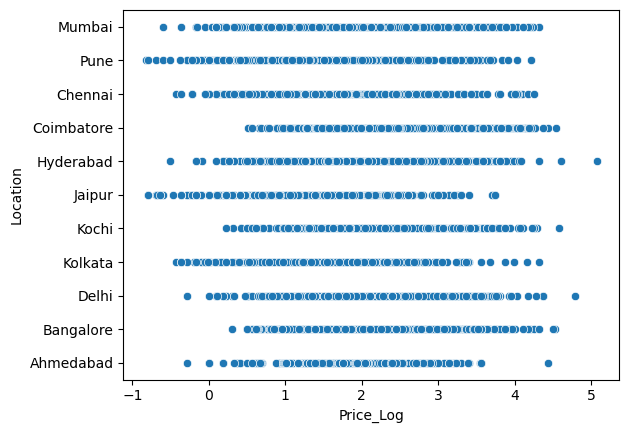

In \[724\]:

    # Scatterplot between price_log and year
    sns.scatterplot(x = 'Price_Log', y = 'Year', data = df)
    plt.show()

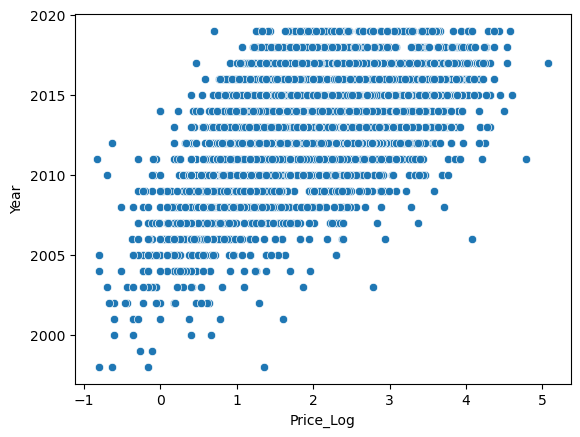

In \[725\]:

    # Scatterplot between price_log and fuel type
    sns.scatterplot(x = 'Price_Log', y = 'Fuel_Type', data = df)
    plt.show()

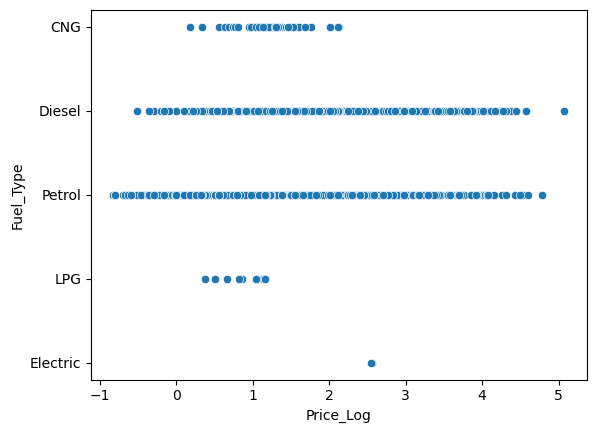

In \[726\]:

    # Scatterplot between price_log and transmission
    sns.scatterplot(x = 'Price_Log', y = 'Transmission', data = df)
    plt.show()

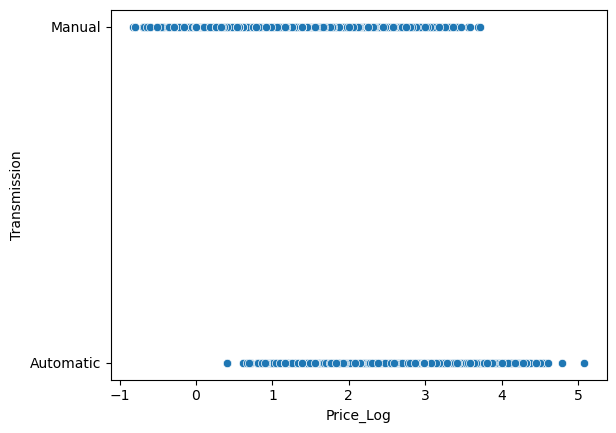

In \[727\]:

    # Scatterplot between price_log and owner
    sns.scatterplot(x = 'Price_Log', y = 'Owner_Type', data = df)
    plt.show()

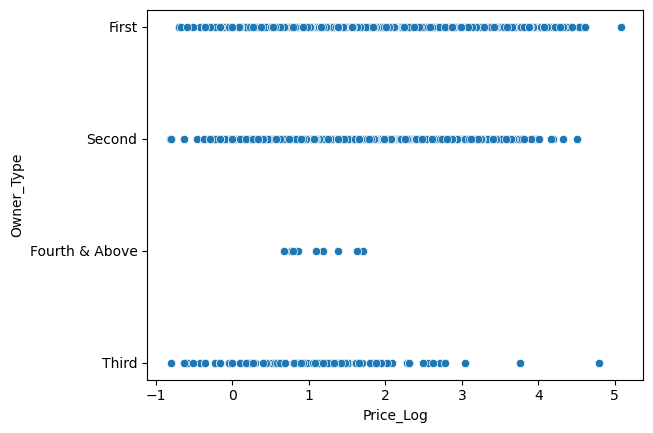

In \[728\]:

    # Scatterplot between price_log and mileage
    sns.scatterplot(x = 'Price_Log', y = 'Mileage', data = df)
    plt.show()

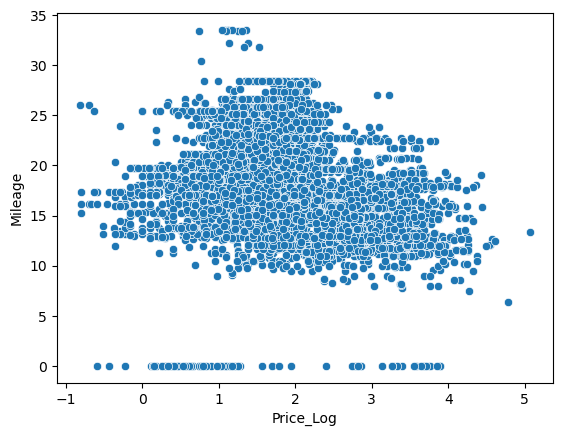

In \[729\]:

    # Scatterplot between price_log and engine
    sns.scatterplot(x = 'Price_Log', y = 'Engine', data = df)
    plt.show()

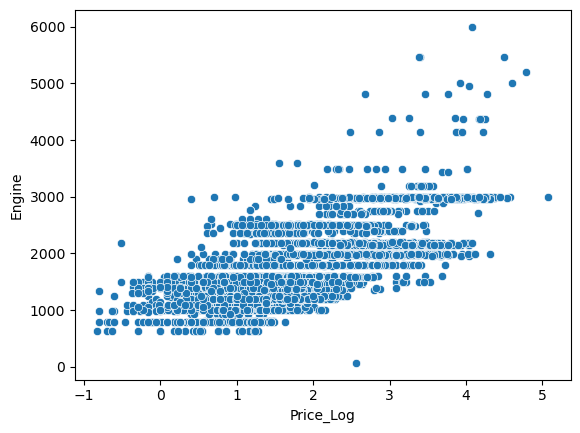

In \[730\]:

    # Scatterplot between price_log and power
    sns.scatterplot(x = 'Price_Log', y = 'Power', data = df)
    plt.show()

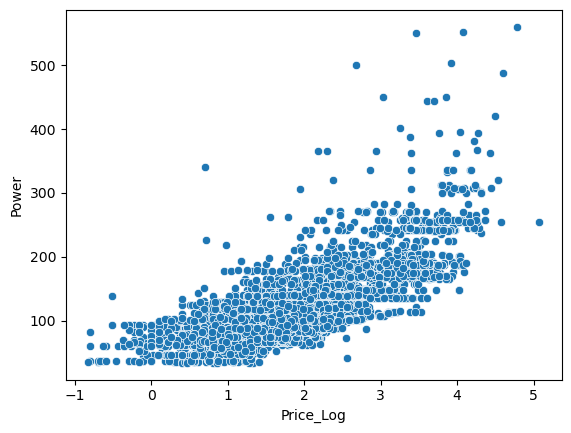

In \[731\]:

    # Scatterplot between price_log and seats
    sns.scatterplot(x = 'Price_Log', y = 'Seats', data = df)
    plt.show()

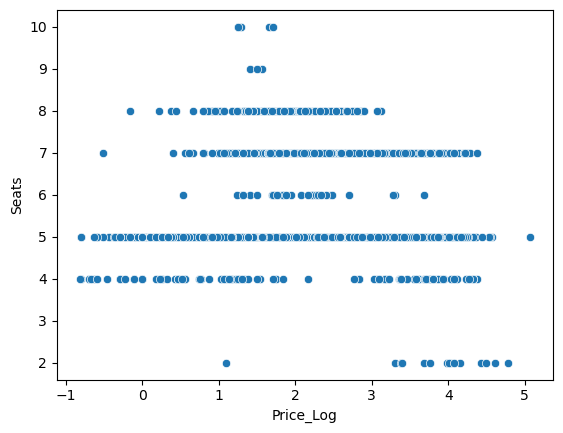

In \[732\]:

    # Scatterplot between kilometers driven log and location
    sns.scatterplot(x = 'KM_Log', y = 'Location', data = df)
    plt.show()

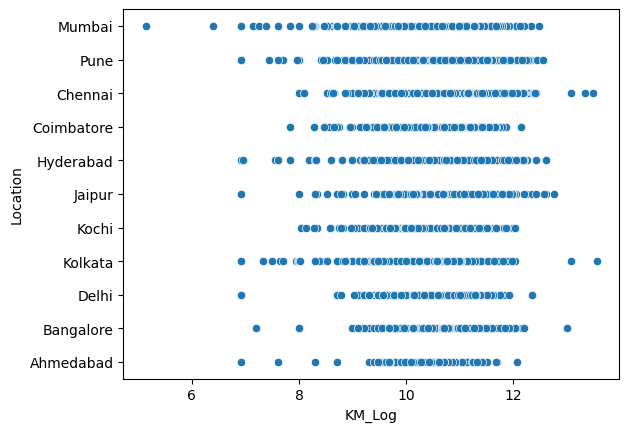

In \[733\]:

    # Scatterplot between kilometers driven log and year
    sns.scatterplot(x = 'KM_Log', y = 'Year', data = df)
    plt.show()

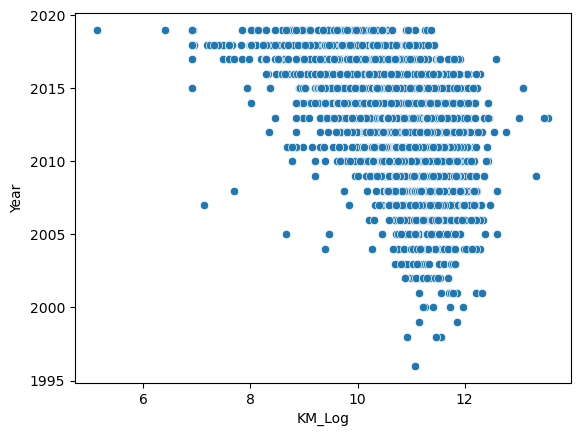

In \[734\]:

    # Scatterplot between kilometers driven log and fuel type
    sns.scatterplot(x = 'KM_Log', y = 'Fuel_Type', data = df)
    plt.show()

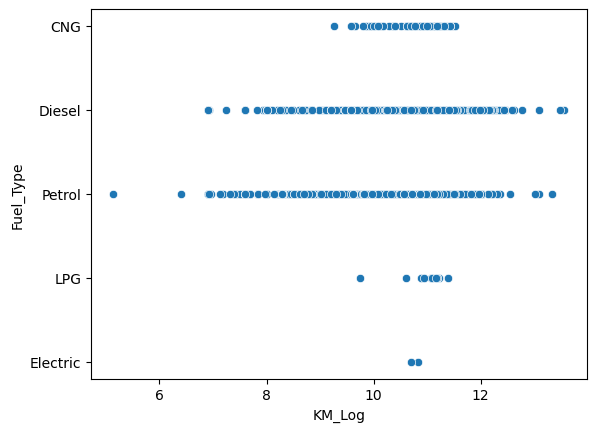

In \[735\]:

    # Scatterplot between kilometers driven log and transmission
    sns.scatterplot(x = 'Price_Log', y = 'Transmission', data = df)
    plt.show()

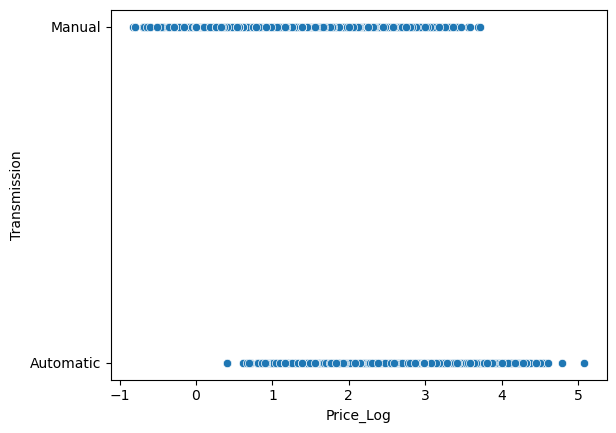

In \[736\]:

    # Scatterplot between kilometers driven log and owner
    sns.scatterplot(x = 'Price_Log', y = 'Owner_Type', data = df)
    plt.show()

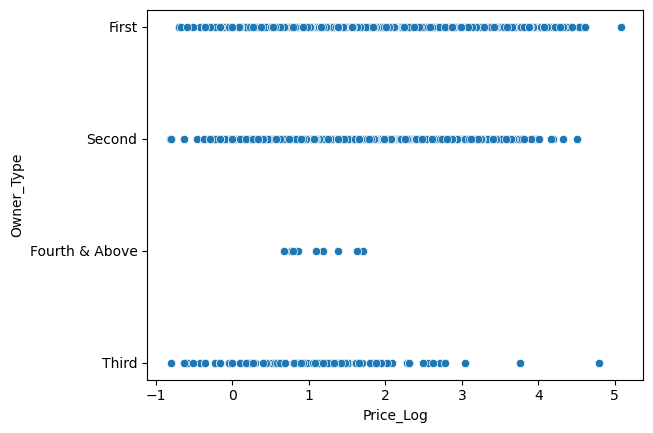

In \[737\]:

    # Scatterplot between kilometers driven log and mileage
    sns.scatterplot(x = 'KM_Log', y = 'Mileage', data = df)
    plt.show()

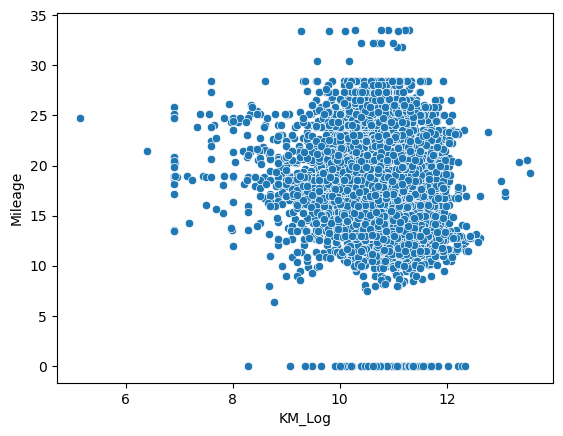

In \[738\]:

    # Scatterplot between kilometers driven log and engine
    sns.scatterplot(x = 'KM_Log', y = 'Engine', data = df)
    plt.show()

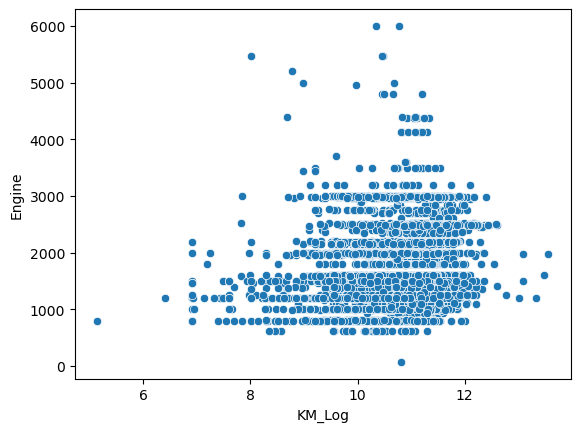

In \[739\]:

    # Scatterplot between kilometers driven log and power
    sns.scatterplot(x = 'KM_Log', y = 'Power', data = df)
    plt.show()

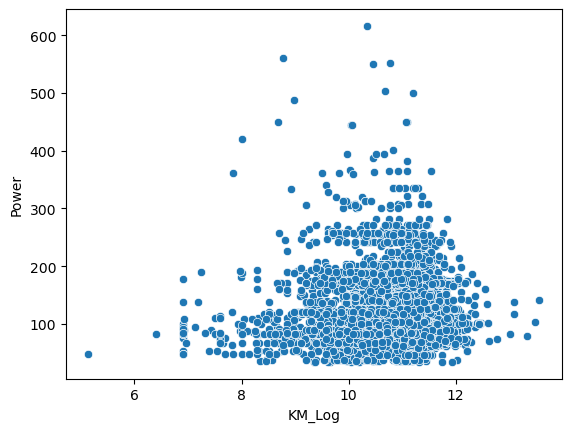

In \[740\]:

    # Scatterplot between kilometers driven log and seats
    sns.scatterplot(x = 'KM_Log', y = 'Seats', data = df)
    plt.show()

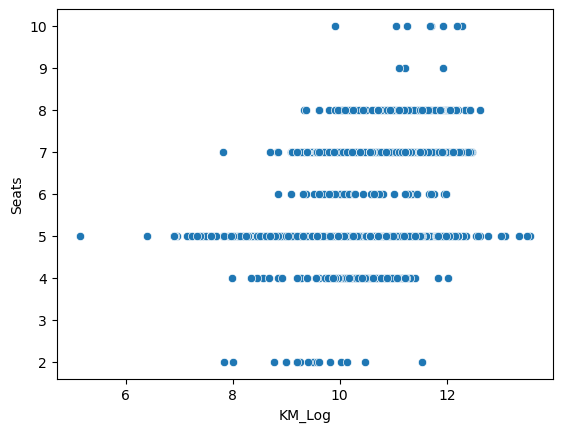

### Scatterplot Observations<a href="#Scatterplot-Observations" class="anchor-link">¶</a>

-   Price log
    -   Price log and Year has a positive correlation. As the Year of
        the car increases, the price increases, which mkaes sense since
        newer cars would have more value.
    -   Price log and Engine has a positive correlation. As Engine
        increases, the price increases.
    -   Price log and Power has a positive correlation. As Power
        increases, the price increases.
    -   Price log and Mileage has a lot of clustered data where mileage
        is between 10 and 30 especially where price log is between 1 and
        2

<!-- -->

-   Kilometers Driven log
    -   KM Driven log and Year has a negative correlation. As the year
        increases, the KM Driven decreases, which makes sense since
        newer cars are driven less than older cars
    -   KM Driven log & Mileage has clustered data where mileage is
        between 10 and 30 and KM log is between 10 and 12
    -   KM Driven log & Engine has clustered data where Engine is
        between 1000 and 3000 and KM log is between 10 and 12
    -   KM Driven log & Power has clustered data where Power is between
        50 and 300 and KM log is between 10 and 12

In \[741\]:

    # What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
    # Heatmap with only log transformed columns, need to drop original skewed data

    plt.figure(figsize = (10, 10))
    sns.heatmap(df.drop(['Kilometers_Driven', 'Price'],axis = 1).corr(numeric_only = True), annot = True, vmin = -1, vmax = 1)
    plt.show()

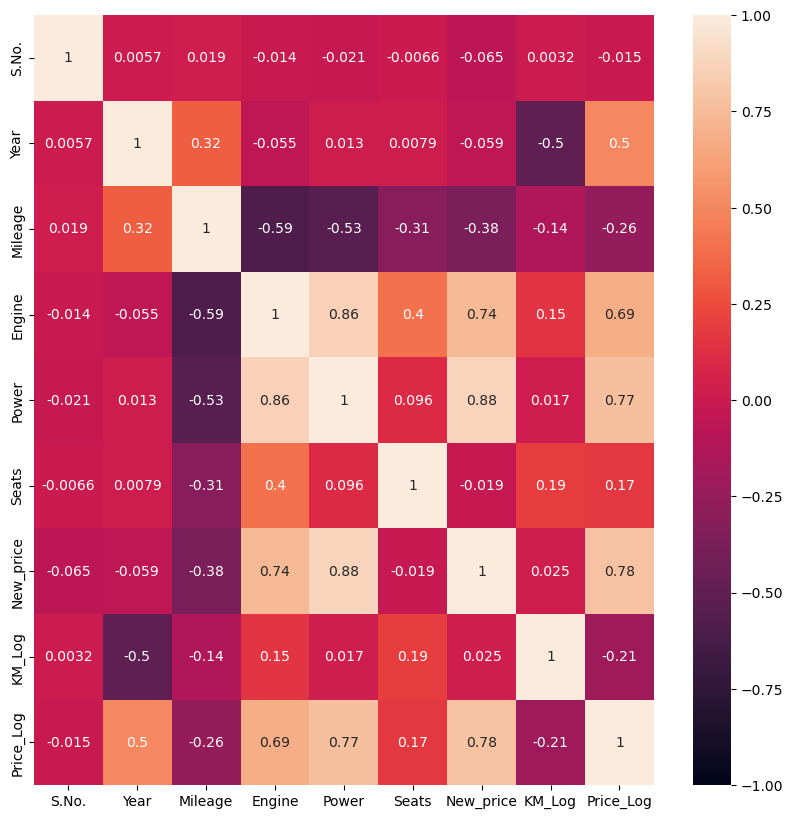

### Heatmap Observations<a href="#Heatmap-Observations" class="anchor-link">¶</a>

#### Strong Correlation Observations (\>=0.5 or \<=-0.5)<a href="#Strong-Correlation-Observations-(%3E=0.5-or-%3C=-0.5)"
class="anchor-link">¶</a>

###### Dependent variable correlations<a href="#Dependent-variable-correlations" class="anchor-link">¶</a>

-   Positive correlation between Price_Log and Power (0.77)
-   Positive correlation between Price_Log and Engine (0.69)
    -   The above 2 findings show that power and engine influence the
        price. It makes sense since the engine is the most important
        part of the car and power is also a measure of the engine
-   Positive correlation between Price_Log and Year (0.5)
    -   The price is dependent on the year since the newer a car, the
        higher the price

###### Independent variable correlations<a href="#Independent-variable-correlations" class="anchor-link">¶</a>

-   Positive correlation between Power and Engine (0.86)
    -   Power and Engine are strongly correlated since they're both
        measures of engine health
-   Negative correlation between KM_Log and Year (-0.5)
    -   This correlates with the scatterplot findings. The older a car,
        the more it will have been driven/used
-   Negative correlation between Mileage and Engine (-0.59)
-   Negative correlation between Mileage and Power (-0.53)
    -   The above 2 findings make sense since the more a car is driven
        or used, the engine health will decline

In \[742\]:

    # Plot a box plot for target variable and categorical variable 'Location' and write your observations?
    # This function takes the categorical column as the input and returns the boxplots for the variable.
    def boxplot(z):

        plt.figure(figsize = (12, 5)) # Setting size of boxplot

        sns.boxplot(x = z, y = df['Price']) # Defining x and y

        plt.show()

        plt.figure(figsize = (12, 5))

        plt.title('Without Outliers')

        sns.boxplot(x = z, y = df['Price'], showfliers = False) # Turning off the outliers

        plt.show()

In \[743\]:

    # Box plot for price and location
    boxplot(data['Location'])

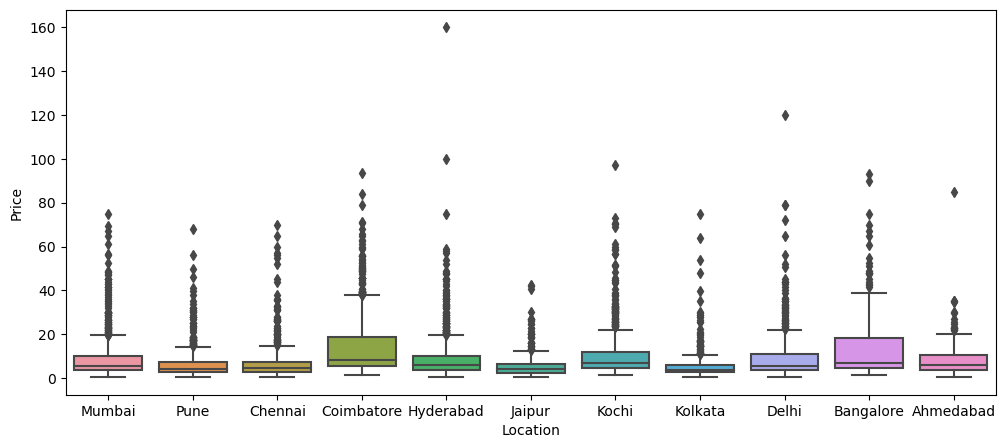

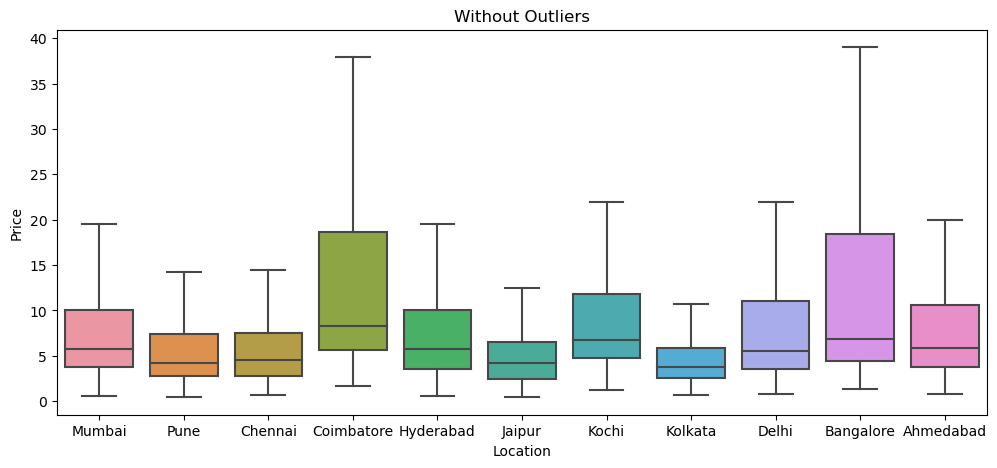

### Boxplot Observations<a href="#Boxplot-Observations" class="anchor-link">¶</a>

-   The medians are all very similar and right skewed across all
    locations
-   Jaipur has the least amount of skew
-   Coimbatore and Bangalore have the highest medians, longer
    dispersions, and longer upper whiskers than all other locations. The
    price range seems to vary the most in these locations. It might be
    good to focus on these locations for car resales.
-   There are many outliers outside of the upper limit for all locations

### **Feature Engineering**<a href="#Feature-Engineering" class="anchor-link">¶</a>

**Think about it:** The `Name` column in the current format might not be
very useful in our analysis. Since the name contains both the brand name
and the model name of the vehicle, the column would have too many unique
values to be useful in prediction. Can we extract that information from
that column?

-   **Hint:** With 2041 unique names, car names are not going to be
    great predictors of the price in our current data. But we can
    process this column to extract important information for example
    brand name.

In \[744\]:

    # Extract Brand from Name
    df["Brand"] = data["Name"].apply(lambda x: x.split(" ")[0].lower())

In \[745\]:

    # Extract Model from Name
    df["Model"] = data["Name"].apply(lambda x: x.split(" ")[1].lower())

In \[746\]:

    # Remove Name column
    df = df.drop("Name", axis=1)

In \[747\]:

    # Check columns for Brand and Model & Name drop
    df.head()

Out\[747\]:

|     | S.No. | Location   | Year | Kilometers_Driven | Fuel_Type | Transmission | Owner_Type | Mileage | Engine | Power  | Seats | New_price | Price | KM_Log    | Price_Log | Brand   | Model  |
|-----|-------|------------|------|-------------------|-----------|--------------|------------|---------|--------|--------|-------|-----------|-------|-----------|-----------|---------|--------|
| 0   | 0     | Mumbai     | 2010 | 72000             | CNG       | Manual       | First      | 26.60   | 998.0  | 58.16  | 5.0   | NaN       | 1.75  | 11.184421 | 0.559616  | maruti  | wagon  |
| 1   | 1     | Pune       | 2015 | 41000             | Diesel    | Manual       | First      | 19.67   | 1582.0 | 126.20 | 5.0   | NaN       | 12.50 | 10.621327 | 2.525729  | hyundai | creta  |
| 2   | 2     | Chennai    | 2011 | 46000             | Petrol    | Manual       | First      | 18.20   | 1199.0 | 88.70  | 5.0   | 8.61      | 4.50  | 10.736397 | 1.504077  | honda   | jazz   |
| 3   | 3     | Chennai    | 2012 | 87000             | Diesel    | Manual       | First      | 20.77   | 1248.0 | 88.76  | 7.0   | NaN       | 6.00  | 11.373663 | 1.791759  | maruti  | ertiga |
| 4   | 4     | Coimbatore | 2013 | 40670             | Diesel    | Automatic    | Second     | 15.20   | 1968.0 | 140.80 | 5.0   | NaN       | 17.74 | 10.613246 | 2.875822  | audi    | a4     |

### **Missing value treatment**<a href="#Missing-value-treatment" class="anchor-link">¶</a>

In \[748\]:

    # Show rows where null values in Mileage
    mileage_missing_data = df[df['Mileage'].isnull()]
    print(mileage_missing_data)

          S.No. Location  Year  Kilometers_Driven Fuel_Type Transmission  \
    4446   4446  Chennai  2016              50000  Electric    Automatic   
    4904   4904   Mumbai  2011              44000  Electric    Automatic   

         Owner_Type  Mileage  Engine  Power  Seats  New_price  Price     KM_Log  \
    4446      First      NaN    72.0   41.0    5.0      13.58  13.00  10.819778   
    4904      First      NaN  1798.0   73.0    5.0        NaN  12.75  10.691945   

          Price_Log     Brand  Model  
    4446   2.564949  mahindra      e  
    4904   2.545531    toyota  prius  

In \[749\]:

    # impute Mileage and fill with median value
    df['Mileage'] = (df['Mileage'].fillna(df['Mileage'].median))

In \[750\]:

    # Check if null values in Mileage
    mileage_missing_data = df[df['Mileage'].isnull()]
    print(mileage_missing_data)

    Empty DataFrame
    Columns: [S.No., Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_price, Price, KM_Log, Price_Log, Brand, Model]
    Index: []

In \[751\]:

    # Show rows where null values in Seats
    seats_missing_data = df[df['Seats'].isnull()]
    print(seats_missing_data)

          S.No.    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
    194     194   Ahmedabad  2007              60006    Petrol       Manual   
    208     208     Kolkata  2010              42001    Petrol       Manual   
    229     229   Bangalore  2015              70436    Diesel       Manual   
    733     733     Chennai  2006              97800    Petrol       Manual   
    749     749      Mumbai  2008              55001    Diesel    Automatic   
    1294   1294       Delhi  2009              55005    Petrol       Manual   
    1327   1327   Hyderabad  2015              50295    Petrol       Manual   
    1385   1385        Pune  2004             115000    Petrol       Manual   
    1460   1460  Coimbatore  2008              69078    Petrol       Manual   
    1917   1917      Jaipur  2005              88000    Petrol       Manual   
    2074   2074        Pune  2011              24255    Petrol       Manual   
    2096   2096  Coimbatore  2004              52146    Petrol       Manual   
    2264   2264        Pune  2012              24500    Petrol       Manual   
    2325   2325        Pune  2015              67000    Petrol       Manual   
    2335   2335      Mumbai  2007              55000    Petrol       Manual   
    2369   2369     Chennai  2008              56000    Petrol       Manual   
    2530   2530       Kochi  2014              64158    Diesel    Automatic   
    2542   2542   Bangalore  2011              65000    Petrol       Manual   
    2623   2623        Pune  2012              95000    Diesel    Automatic   
    2668   2668     Kolkata  2014              32986    Petrol       Manual   
    2737   2737      Jaipur  2001             200000    Petrol       Manual   
    2780   2780        Pune  2009             100000    Petrol       Manual   
    2842   2842   Bangalore  2012              43000    Petrol       Manual   
    3272   3272      Mumbai  2008              81000    Diesel    Automatic   
    3404   3404      Jaipur  2006             125000    Petrol       Manual   
    3520   3520       Delhi  2012              90000    Diesel    Automatic   
    3522   3522       Kochi  2012              66400    Petrol       Manual   
    3800   3800      Mumbai  2012             129000    Diesel    Automatic   
    3810   3810     Kolkata  2013              27000    Petrol    Automatic   
    3882   3882     Kolkata  2010              40000    Petrol       Manual   
    4011   4011        Pune  2011              45271    Diesel       Manual   
    4152   4152      Mumbai  2003              75000    Diesel    Automatic   
    4229   4229   Bangalore  2005              79000    Petrol       Manual   
    4577   4577       Delhi  2012              72000    Diesel    Automatic   
    4604   4604        Pune  2011              98000    Petrol       Manual   
    4697   4697       Kochi  2017              17941    Petrol       Manual   
    4712   4712        Pune  2003              80000    Petrol       Manual   
    4952   4952     Kolkata  2010              47000    Petrol       Manual   
    5015   5015       Delhi  2006              63000    Petrol       Manual   
    5185   5185       Delhi  2012              52000    Petrol       Manual   
    5270   5270   Bangalore  2002              53000    Petrol       Manual   
    5893   5893     Chennai  2008              51000    Petrol       Manual   
    6042   6042   Bangalore  2009              72000    Petrol       Manual   
    6541   6541   Bangalore  2012              56600    Diesel       Manual   
    6544   6544   Bangalore  2012              58000    Petrol    Automatic   
    6633   6633     Kolkata  2016              27000    Diesel       Manual   
    6643   6643   Bangalore  2009             150000    Diesel    Automatic   
    6651   6651     Kolkata  2015              36009    Petrol       Manual   
    6677   6677      Jaipur  2010              65000    Petrol       Manual   
    6685   6685        Pune  2010             115000    Petrol       Manual   
    6880   6880     Chennai  2009              95000    Diesel    Automatic   
    6902   6902       Kochi  2012              59311    Petrol       Manual   
    6957   6957       Kochi  2019              11574    Petrol       Manual   

              Owner_Type Mileage  Engine  Power  Seats  New_price  Price  \
    194            First     0.0     NaN    NaN    NaN        NaN   2.95   
    208            First    16.1     NaN    NaN    NaN        NaN   2.11   
    229            First     0.0  1498.0   99.0    NaN        NaN   3.60   
    733            Third    16.1     NaN    NaN    NaN        NaN   1.75   
    749           Second     0.0     NaN    NaN    NaN        NaN  26.50   
    1294           First    12.8     NaN    NaN    NaN        NaN   3.20   
    1327           First    16.1     NaN    NaN    NaN        NaN   5.80   
    1385          Second     0.0     NaN    NaN    NaN        NaN   1.50   
    1460           First     0.0     NaN    NaN    NaN        NaN  40.88   
    1917          Second    13.0  1493.0  100.0    NaN        NaN   1.70   
    2074           First    16.1     NaN    NaN    NaN        NaN   3.15   
    2096           First     0.0     NaN    NaN    NaN        NaN   1.93   
    2264          Second    18.3     NaN    NaN    NaN        NaN   2.95   
    2325           First    16.1     NaN    NaN    NaN        NaN   4.70   
    2335          Second    16.1     NaN    NaN    NaN        NaN   1.75   
    2369          Second    19.5  1061.0    NaN    NaN        NaN   1.50   
    2530           First   18.48     NaN    NaN    NaN        NaN  17.89   
    2542          Second     0.0     NaN    NaN    NaN        NaN   3.15   
    2623          Second   18.48     NaN    NaN    NaN        NaN  18.00   
    2668           First    16.1     NaN    NaN    NaN        NaN   4.24   
    2737           First    12.0     NaN    NaN    NaN        NaN   0.70   
    2780           First     0.0     NaN    NaN    NaN        NaN   1.60   
    2842           First     0.0     NaN    NaN    NaN        NaN   3.25   
    3272          Second   18.48     NaN    NaN    NaN        NaN  10.50   
    3404  Fourth & Above    16.1     NaN    NaN    NaN        NaN   2.35   
    3520           First   18.48     NaN    NaN    NaN        NaN  14.50   
    3522           First     0.0     NaN    NaN    NaN        NaN   2.66   
    3800           First    12.8  2953.0    NaN    NaN        NaN   7.00   
    3810           First    14.0     NaN    NaN    NaN        NaN  11.99   
    3882          Second    19.5  1061.0    NaN    NaN        NaN   2.50   
    4011           First    20.3     NaN    NaN    NaN        NaN   2.60   
    4152          Second     0.0     NaN    NaN    NaN        NaN  16.11   
    4229          Second    17.0     NaN    NaN    NaN        NaN   1.65   
    4577           Third   18.48     NaN    NaN    NaN        NaN  13.85   
    4604           First    16.7     NaN    NaN    NaN        NaN   3.15   
    4697           First    15.7     NaN    NaN    NaN        NaN   3.93   
    4712          Second    17.0     NaN    NaN    NaN        NaN   0.90   
    4952           First    14.6     NaN    NaN    NaN        NaN   1.49   
    5015           First    16.1     NaN    NaN    NaN        NaN   1.60   
    5185           First    16.1     NaN    NaN    NaN        NaN   3.65   
    5270          Second     0.0     NaN    NaN    NaN        NaN   1.85   
    5893          Second    19.5  1061.0    NaN    NaN        NaN   1.75   
    6042          Second    17.5     NaN    NaN    NaN        NaN    NaN   
    6541           First   23.59     NaN    NaN    NaN        NaN    NaN   
    6544          Second    15.0     NaN    NaN    NaN        NaN    NaN   
    6633           First     0.0     NaN    NaN    NaN        NaN    NaN   
    6643          Second   18.48     NaN    NaN    NaN        NaN    NaN   
    6651           First    16.1     NaN    NaN    NaN        NaN    NaN   
    6677           Third    14.6     NaN    NaN    NaN        NaN    NaN   
    6685          Second    16.1     NaN    NaN    NaN        NaN    NaN   
    6880          Second   18.48     NaN    NaN    NaN        NaN    NaN   
    6902           First    18.3     NaN    NaN    NaN        NaN    NaN   
    6957           First     0.0  1199.0   88.7    NaN        NaN    NaN   

             KM_Log  Price_Log     Brand      Model  
    194   11.002200   1.081805     honda       city  
    208   10.645449   0.746688    maruti      swift  
    229   11.162460   1.280934      ford       figo  
    733   11.490680   0.559616    maruti      swift  
    749   10.915107   3.277145      land      rover  
    1294  10.915179   1.163151     honda       city  
    1327  10.825661   1.757858    maruti      swift  
    1385  11.652687   0.405465     honda       city  
    1460  11.142992   3.710641      land      rover  
    1917  11.385092   0.530628     honda       city  
    2074  10.096378   1.147402    maruti      swift  
    2096  10.861803   0.657520   hyundai     santro  
    2264  10.106428   1.081805    toyota      etios  
    2325  11.112448   1.547563    maruti      swift  
    2335  10.915088   0.559616    maruti      swift  
    2369  10.933107   0.405465    maruti     estilo  
    2530  11.069104   2.884242       bmw          5  
    2542  11.082143   1.147402   hyundai     santro  
    2623  11.461632   2.890372       bmw          5  
    2668  10.403839   1.444563    maruti      swift  
    2737  12.206073  -0.356675    maruti      wagon  
    2780  11.512925   0.470004   hyundai     santro  
    2842  10.668955   1.178655   hyundai     santro  
    3272  11.302204   2.351375       bmw          5  
    3404  11.736069   0.854415    maruti      swift  
    3520  11.407565   2.674149       bmw          5  
    3522  11.103452   0.978326   hyundai     santro  
    3800  11.767568   1.945910      ford  endeavour  
    3810  10.203592   2.484073     honda       cr-v  
    3882  10.596635   0.916291    maruti     estilo  
    4011  10.720422   0.955511      fiat      punto  
    4152  11.225243   2.779440      land      rover  
    4229  11.277203   0.500775   hyundai     santro  
    4577  11.184421   2.628285       bmw          5  
    4604  11.492723   1.147402     honda       jazz  
    4697   9.794844   1.368639      fiat      punto  
    4712  11.289782  -0.105361   hyundai     santro  
    4952  10.757903   0.398776      fiat      punto  
    5015  11.050890   0.470004    maruti      swift  
    5185  10.858999   1.294727    maruti      swift  
    5270  10.878047   0.615186     honda       city  
    5893  10.839581   0.559616    maruti     estilo  
    6042  11.184421        NaN     skoda      laura  
    6541  10.943764        NaN    toyota      etios  
    6544  10.968198        NaN   hyundai        i20  
    6633  10.203592        NaN  mahindra        tuv  
    6643  11.918391        NaN       bmw          5  
    6651  10.491524        NaN    maruti      swift  
    6677  11.082143        NaN      fiat      punto  
    6685  11.652687        NaN    maruti      swift  
    6880  11.461632        NaN       bmw          5  
    6902  10.990550        NaN    toyota      etios  
    6957   9.356516        NaN     honda       jazz  

In \[752\]:

    # impute Seats and fill with median value
    df['Seats'] = (df['Seats'].fillna(df['Seats'].median))

In \[753\]:

    # check if null values in seats
    seats_missing_data = df[df['Seats'].isnull()]
    print(seats_missing_data)

    Empty DataFrame
    Columns: [S.No., Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_price, Price, KM_Log, Price_Log, Brand, Model]
    Index: []

In \[754\]:

    # Show rows where null values in Engine
    engine_missing_data = df[df['Engine'].isnull()]
    print(engine_missing_data)

          S.No.    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
    194     194   Ahmedabad  2007              60006    Petrol       Manual   
    208     208     Kolkata  2010              42001    Petrol       Manual   
    733     733     Chennai  2006              97800    Petrol       Manual   
    749     749      Mumbai  2008              55001    Diesel    Automatic   
    1294   1294       Delhi  2009              55005    Petrol       Manual   
    1327   1327   Hyderabad  2015              50295    Petrol       Manual   
    1385   1385        Pune  2004             115000    Petrol       Manual   
    1460   1460  Coimbatore  2008              69078    Petrol       Manual   
    2074   2074        Pune  2011              24255    Petrol       Manual   
    2096   2096  Coimbatore  2004              52146    Petrol       Manual   
    2264   2264        Pune  2012              24500    Petrol       Manual   
    2325   2325        Pune  2015              67000    Petrol       Manual   
    2335   2335      Mumbai  2007              55000    Petrol       Manual   
    2530   2530       Kochi  2014              64158    Diesel    Automatic   
    2542   2542   Bangalore  2011              65000    Petrol       Manual   
    2623   2623        Pune  2012              95000    Diesel    Automatic   
    2668   2668     Kolkata  2014              32986    Petrol       Manual   
    2737   2737      Jaipur  2001             200000    Petrol       Manual   
    2780   2780        Pune  2009             100000    Petrol       Manual   
    2842   2842   Bangalore  2012              43000    Petrol       Manual   
    3272   3272      Mumbai  2008              81000    Diesel    Automatic   
    3404   3404      Jaipur  2006             125000    Petrol       Manual   
    3520   3520       Delhi  2012              90000    Diesel    Automatic   
    3522   3522       Kochi  2012              66400    Petrol       Manual   
    3810   3810     Kolkata  2013              27000    Petrol    Automatic   
    4011   4011        Pune  2011              45271    Diesel       Manual   
    4152   4152      Mumbai  2003              75000    Diesel    Automatic   
    4229   4229   Bangalore  2005              79000    Petrol       Manual   
    4577   4577       Delhi  2012              72000    Diesel    Automatic   
    4604   4604        Pune  2011              98000    Petrol       Manual   
    4697   4697       Kochi  2017              17941    Petrol       Manual   
    4712   4712        Pune  2003              80000    Petrol       Manual   
    4952   4952     Kolkata  2010              47000    Petrol       Manual   
    5015   5015       Delhi  2006              63000    Petrol       Manual   
    5185   5185       Delhi  2012              52000    Petrol       Manual   
    5270   5270   Bangalore  2002              53000    Petrol       Manual   
    6042   6042   Bangalore  2009              72000    Petrol       Manual   
    6541   6541   Bangalore  2012              56600    Diesel       Manual   
    6544   6544   Bangalore  2012              58000    Petrol    Automatic   
    6633   6633     Kolkata  2016              27000    Diesel       Manual   
    6643   6643   Bangalore  2009             150000    Diesel    Automatic   
    6651   6651     Kolkata  2015              36009    Petrol       Manual   
    6677   6677      Jaipur  2010              65000    Petrol       Manual   
    6685   6685        Pune  2010             115000    Petrol       Manual   
    6880   6880     Chennai  2009              95000    Diesel    Automatic   
    6902   6902       Kochi  2012              59311    Petrol       Manual   

              Owner_Type Mileage  Engine  Power  \
    194            First     0.0     NaN    NaN   
    208            First    16.1     NaN    NaN   
    733            Third    16.1     NaN    NaN   
    749           Second     0.0     NaN    NaN   
    1294           First    12.8     NaN    NaN   
    1327           First    16.1     NaN    NaN   
    1385          Second     0.0     NaN    NaN   
    1460           First     0.0     NaN    NaN   
    2074           First    16.1     NaN    NaN   
    2096           First     0.0     NaN    NaN   
    2264          Second    18.3     NaN    NaN   
    2325           First    16.1     NaN    NaN   
    2335          Second    16.1     NaN    NaN   
    2530           First   18.48     NaN    NaN   
    2542          Second     0.0     NaN    NaN   
    2623          Second   18.48     NaN    NaN   
    2668           First    16.1     NaN    NaN   
    2737           First    12.0     NaN    NaN   
    2780           First     0.0     NaN    NaN   
    2842           First     0.0     NaN    NaN   
    3272          Second   18.48     NaN    NaN   
    3404  Fourth & Above    16.1     NaN    NaN   
    3520           First   18.48     NaN    NaN   
    3522           First     0.0     NaN    NaN   
    3810           First    14.0     NaN    NaN   
    4011           First    20.3     NaN    NaN   
    4152          Second     0.0     NaN    NaN   
    4229          Second    17.0     NaN    NaN   
    4577           Third   18.48     NaN    NaN   
    4604           First    16.7     NaN    NaN   
    4697           First    15.7     NaN    NaN   
    4712          Second    17.0     NaN    NaN   
    4952           First    14.6     NaN    NaN   
    5015           First    16.1     NaN    NaN   
    5185           First    16.1     NaN    NaN   
    5270          Second     0.0     NaN    NaN   
    6042          Second    17.5     NaN    NaN   
    6541           First   23.59     NaN    NaN   
    6544          Second    15.0     NaN    NaN   
    6633           First     0.0     NaN    NaN   
    6643          Second   18.48     NaN    NaN   
    6651           First    16.1     NaN    NaN   
    6677           Third    14.6     NaN    NaN   
    6685          Second    16.1     NaN    NaN   
    6880          Second   18.48     NaN    NaN   
    6902           First    18.3     NaN    NaN   

                                                      Seats  New_price  Price  \
    194   <bound method NDFrame._add_numeric_operations....        NaN   2.95   
    208   <bound method NDFrame._add_numeric_operations....        NaN   2.11   
    733   <bound method NDFrame._add_numeric_operations....        NaN   1.75   
    749   <bound method NDFrame._add_numeric_operations....        NaN  26.50   
    1294  <bound method NDFrame._add_numeric_operations....        NaN   3.20   
    1327  <bound method NDFrame._add_numeric_operations....        NaN   5.80   
    1385  <bound method NDFrame._add_numeric_operations....        NaN   1.50   
    1460  <bound method NDFrame._add_numeric_operations....        NaN  40.88   
    2074  <bound method NDFrame._add_numeric_operations....        NaN   3.15   
    2096  <bound method NDFrame._add_numeric_operations....        NaN   1.93   
    2264  <bound method NDFrame._add_numeric_operations....        NaN   2.95   
    2325  <bound method NDFrame._add_numeric_operations....        NaN   4.70   
    2335  <bound method NDFrame._add_numeric_operations....        NaN   1.75   
    2530  <bound method NDFrame._add_numeric_operations....        NaN  17.89   
    2542  <bound method NDFrame._add_numeric_operations....        NaN   3.15   
    2623  <bound method NDFrame._add_numeric_operations....        NaN  18.00   
    2668  <bound method NDFrame._add_numeric_operations....        NaN   4.24   
    2737  <bound method NDFrame._add_numeric_operations....        NaN   0.70   
    2780  <bound method NDFrame._add_numeric_operations....        NaN   1.60   
    2842  <bound method NDFrame._add_numeric_operations....        NaN   3.25   
    3272  <bound method NDFrame._add_numeric_operations....        NaN  10.50   
    3404  <bound method NDFrame._add_numeric_operations....        NaN   2.35   
    3520  <bound method NDFrame._add_numeric_operations....        NaN  14.50   
    3522  <bound method NDFrame._add_numeric_operations....        NaN   2.66   
    3810  <bound method NDFrame._add_numeric_operations....        NaN  11.99   
    4011  <bound method NDFrame._add_numeric_operations....        NaN   2.60   
    4152  <bound method NDFrame._add_numeric_operations....        NaN  16.11   
    4229  <bound method NDFrame._add_numeric_operations....        NaN   1.65   
    4577  <bound method NDFrame._add_numeric_operations....        NaN  13.85   
    4604  <bound method NDFrame._add_numeric_operations....        NaN   3.15   
    4697  <bound method NDFrame._add_numeric_operations....        NaN   3.93   
    4712  <bound method NDFrame._add_numeric_operations....        NaN   0.90   
    4952  <bound method NDFrame._add_numeric_operations....        NaN   1.49   
    5015  <bound method NDFrame._add_numeric_operations....        NaN   1.60   
    5185  <bound method NDFrame._add_numeric_operations....        NaN   3.65   
    5270  <bound method NDFrame._add_numeric_operations....        NaN   1.85   
    6042  <bound method NDFrame._add_numeric_operations....        NaN    NaN   
    6541  <bound method NDFrame._add_numeric_operations....        NaN    NaN   
    6544  <bound method NDFrame._add_numeric_operations....        NaN    NaN   
    6633  <bound method NDFrame._add_numeric_operations....        NaN    NaN   
    6643  <bound method NDFrame._add_numeric_operations....        NaN    NaN   
    6651  <bound method NDFrame._add_numeric_operations....        NaN    NaN   
    6677  <bound method NDFrame._add_numeric_operations....        NaN    NaN   
    6685  <bound method NDFrame._add_numeric_operations....        NaN    NaN   
    6880  <bound method NDFrame._add_numeric_operations....        NaN    NaN   
    6902  <bound method NDFrame._add_numeric_operations....        NaN    NaN   

             KM_Log  Price_Log     Brand   Model  
    194   11.002200   1.081805     honda    city  
    208   10.645449   0.746688    maruti   swift  
    733   11.490680   0.559616    maruti   swift  
    749   10.915107   3.277145      land   rover  
    1294  10.915179   1.163151     honda    city  
    1327  10.825661   1.757858    maruti   swift  
    1385  11.652687   0.405465     honda    city  
    1460  11.142992   3.710641      land   rover  
    2074  10.096378   1.147402    maruti   swift  
    2096  10.861803   0.657520   hyundai  santro  
    2264  10.106428   1.081805    toyota   etios  
    2325  11.112448   1.547563    maruti   swift  
    2335  10.915088   0.559616    maruti   swift  
    2530  11.069104   2.884242       bmw       5  
    2542  11.082143   1.147402   hyundai  santro  
    2623  11.461632   2.890372       bmw       5  
    2668  10.403839   1.444563    maruti   swift  
    2737  12.206073  -0.356675    maruti   wagon  
    2780  11.512925   0.470004   hyundai  santro  
    2842  10.668955   1.178655   hyundai  santro  
    3272  11.302204   2.351375       bmw       5  
    3404  11.736069   0.854415    maruti   swift  
    3520  11.407565   2.674149       bmw       5  
    3522  11.103452   0.978326   hyundai  santro  
    3810  10.203592   2.484073     honda    cr-v  
    4011  10.720422   0.955511      fiat   punto  
    4152  11.225243   2.779440      land   rover  
    4229  11.277203   0.500775   hyundai  santro  
    4577  11.184421   2.628285       bmw       5  
    4604  11.492723   1.147402     honda    jazz  
    4697   9.794844   1.368639      fiat   punto  
    4712  11.289782  -0.105361   hyundai  santro  
    4952  10.757903   0.398776      fiat   punto  
    5015  11.050890   0.470004    maruti   swift  
    5185  10.858999   1.294727    maruti   swift  
    5270  10.878047   0.615186     honda    city  
    6042  11.184421        NaN     skoda   laura  
    6541  10.943764        NaN    toyota   etios  
    6544  10.968198        NaN   hyundai     i20  
    6633  10.203592        NaN  mahindra     tuv  
    6643  11.918391        NaN       bmw       5  
    6651  10.491524        NaN    maruti   swift  
    6677  11.082143        NaN      fiat   punto  
    6685  11.652687        NaN    maruti   swift  
    6880  11.461632        NaN       bmw       5  
    6902  10.990550        NaN    toyota   etios  

In \[755\]:

    # impute Engine and fill with mean value
    df['Engine'] = (df['Engine'].fillna(df['Engine'].mean))

In \[756\]:

    # check if null values in engine
    engine_missing_data = df[df['Engine'].isnull()]
    print(engine_missing_data)

    Empty DataFrame
    Columns: [S.No., Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_price, Price, KM_Log, Price_Log, Brand, Model]
    Index: []

In \[757\]:

    # Show rows where null values in Power
    power_missing_data = df[df['Power'].isnull()]
    print(power_missing_data)

          S.No.    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
    76       76      Jaipur  2008             111111    Diesel       Manual   
    79       79   Hyderabad  2005              87591    Petrol       Manual   
    89       89   Hyderabad  2007              73745    Petrol       Manual   
    120     120      Mumbai  2005             102000    Petrol       Manual   
    143     143       Kochi  2008              80759    Petrol       Manual   
    ...     ...         ...   ...                ...       ...          ...   
    6896   6896   Hyderabad  2013              86000    Diesel       Manual   
    6902   6902       Kochi  2012              59311    Petrol       Manual   
    6947   6947       Delhi  2012              77800    Petrol       Manual   
    7092   7092  Coimbatore  2007              64168    Petrol    Automatic   
    7145   7145     Kolkata  2012              37212    Petrol       Manual   

         Owner_Type Mileage                                             Engine  \
    76        First    17.8                                             1399.0   
    79        First     0.0                                             1086.0   
    89        First    17.0                                             1086.0   
    120      Second    17.0                                             1086.0   
    143       Third    17.0                                             1086.0   
    ...         ...     ...                                                ...   
    6896      First   23.59                                             1364.0   
    6902      First    18.3  <bound method NDFrame._add_numeric_operations....   
    6947      First    18.3                                             1197.0   
    7092      First    17.0                                             1086.0   
    7145      First    18.3                                             1197.0   

          Power                                              Seats  New_price  \
    76      NaN                                                5.0        NaN   
    79      NaN                                                5.0        NaN   
    89      NaN                                                5.0        NaN   
    120     NaN                                                5.0        NaN   
    143     NaN                                                5.0        NaN   
    ...     ...                                                ...        ...   
    6896    NaN                                                5.0        NaN   
    6902    NaN  <bound method NDFrame._add_numeric_operations....        NaN   
    6947    NaN                                                5.0        NaN   
    7092    NaN                                                5.0        NaN   
    7145    NaN                                                5.0        NaN   

          Price     KM_Log  Price_Log    Brand   Model  
    76     2.00  11.618285   0.693147     ford  fiesta  
    79     1.30  11.380434   0.262364  hyundai  santro  
    89     2.10  11.208368   0.741937  hyundai  santro  
    120    0.85  11.532728  -0.162519  hyundai  santro  
    143    1.67  11.299225   0.512824  hyundai  santro  
    ...     ...        ...        ...      ...     ...  
    6896    NaN  11.362103        NaN   toyota   etios  
    6902    NaN  10.990550        NaN   toyota   etios  
    6947    NaN  11.261897        NaN   toyota   etios  
    7092    NaN  11.069260        NaN  hyundai  santro  
    7145    NaN  10.524387        NaN   toyota   etios  

    [175 rows x 17 columns]

In \[758\]:

    # impute Power and fill with mean value
    df['Power'] = (df['Power'].fillna(df['Power'].mean))

In \[759\]:

    # check if null values in power
    power_missing_data = df[df['Power'].isnull()]
    print(power_missing_data)

    Empty DataFrame
    Columns: [S.No., Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_price, Price, KM_Log, Price_Log, Brand, Model]
    Index: []

In \[760\]:

    # Remove New_price column
    df = df.drop("New_price", axis=1)

In \[761\]:

    # Check if New_price was dropped
    df.head()

Out\[761\]:

|     | S.No. | Location   | Year | Kilometers_Driven | Fuel_Type | Transmission | Owner_Type | Mileage | Engine | Power | Seats | Price | KM_Log    | Price_Log | Brand   | Model  |
|-----|-------|------------|------|-------------------|-----------|--------------|------------|---------|--------|-------|-------|-------|-----------|-----------|---------|--------|
| 0   | 0     | Mumbai     | 2010 | 72000             | CNG       | Manual       | First      | 26.6    | 998.0  | 58.16 | 5.0   | 1.75  | 11.184421 | 0.559616  | maruti  | wagon  |
| 1   | 1     | Pune       | 2015 | 41000             | Diesel    | Manual       | First      | 19.67   | 1582.0 | 126.2 | 5.0   | 12.50 | 10.621327 | 2.525729  | hyundai | creta  |
| 2   | 2     | Chennai    | 2011 | 46000             | Petrol    | Manual       | First      | 18.2    | 1199.0 | 88.7  | 5.0   | 4.50  | 10.736397 | 1.504077  | honda   | jazz   |
| 3   | 3     | Chennai    | 2012 | 87000             | Diesel    | Manual       | First      | 20.77   | 1248.0 | 88.76 | 7.0   | 6.00  | 11.373663 | 1.791759  | maruti  | ertiga |
| 4   | 4     | Coimbatore | 2013 | 40670             | Diesel    | Automatic    | Second     | 15.2    | 1968.0 | 140.8 | 5.0   | 17.74 | 10.613246 | 2.875822  | audi    | a4     |

In \[762\]:

    # Show rows where null values in Price
    price_missing_data = df[df['Price'].isnull()]
    print(price_missing_data)

          S.No.    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
    6019   6019       Delhi  2014              40929       CNG       Manual   
    6020   6020  Coimbatore  2013              54493    Petrol       Manual   
    6021   6021      Mumbai  2017              34000    Diesel       Manual   
    6022   6022   Hyderabad  2012             139000    Diesel       Manual   
    6023   6023      Mumbai  2014              29000    Petrol       Manual   
    ...     ...         ...   ...                ...       ...          ...   
    7248   7248   Hyderabad  2011              89411    Diesel       Manual   
    7249   7249      Mumbai  2015              59000    Petrol    Automatic   
    7250   7250     Kolkata  2012              28000    Diesel       Manual   
    7251   7251        Pune  2013              52262    Petrol    Automatic   
    7252   7252       Kochi  2014              72443    Diesel    Automatic   

         Owner_Type Mileage  Engine  \
    6019      First   32.26   998.0   
    6020     Second    24.7   796.0   
    6021      First   13.68  2393.0   
    6022      First   23.59  1364.0   
    6023      First    18.5  1197.0   
    ...         ...     ...     ...   
    7248      First   20.54  1598.0   
    7249      First   17.21  1197.0   
    7250      First   23.08  1461.0   
    7251      Third    17.2  1197.0   
    7252      First    10.0  2148.0   

                                                      Power Seats  Price  \
    6019                                               58.2   4.0    NaN   
    6020                                               47.3   5.0    NaN   
    6021                                              147.8   7.0    NaN   
    6022  <bound method NDFrame._add_numeric_operations....   5.0    NaN   
    6023                                              82.85   5.0    NaN   
    ...                                                 ...   ...    ...   
    7248                                              103.6   5.0    NaN   
    7249                                              103.6   5.0    NaN   
    7250                                               63.1   5.0    NaN   
    7251                                              103.6   5.0    NaN   
    7252                                              170.0   5.0    NaN   

             KM_Log  Price_Log          Brand    Model  
    6019  10.619594        NaN         maruti     alto  
    6020  10.905828        NaN         maruti     alto  
    6021  10.434116        NaN         toyota   innova  
    6022  11.842229        NaN         toyota    etios  
    6023  10.275051        NaN        hyundai      i20  
    ...         ...        ...            ...      ...  
    7248  11.400999        NaN     volkswagen    vento  
    7249  10.985293        NaN     volkswagen     polo  
    7250  10.239960        NaN         nissan    micra  
    7251  10.864025        NaN     volkswagen     polo  
    7252  11.190555        NaN  mercedes-benz  e-class  

    [1234 rows x 16 columns]

In \[763\]:

    # Remove rows where price is null
    df = df.dropna()

In \[764\]:

    # Check if rows where price is null were removed
    df.info()

    <class 'pandas.core.frame.DataFrame'>
    Index: 6018 entries, 0 to 6018
    Data columns (total 16 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   S.No.              6018 non-null   int64  
     1   Location           6018 non-null   object 
     2   Year               6018 non-null   int64  
     3   Kilometers_Driven  6018 non-null   int64  
     4   Fuel_Type          6018 non-null   object 
     5   Transmission       6018 non-null   object 
     6   Owner_Type         6018 non-null   object 
     7   Mileage            6018 non-null   object 
     8   Engine             6018 non-null   object 
     9   Power              6018 non-null   object 
     10  Seats              6018 non-null   object 
     11  Price              6018 non-null   float64
     12  KM_Log             6018 non-null   float64
     13  Price_Log          6018 non-null   float64
     14  Brand              6018 non-null   object 
     15  Model              6018 non-null   object 
    dtypes: float64(3), int64(3), object(10)
    memory usage: 799.3+ KB

## **Important Insights from EDA and Data Preprocessing**<a href="#Important-Insights-from-EDA-and-Data-Preprocessing"
class="anchor-link">¶</a>

What are the the most important observations and insights from the data
based on the EDA and Data Preprocessing performed?

## **Building Various Models**<a href="#Building-Various-Models" class="anchor-link">¶</a>

1.  What we want to predict is the "Price". We will use the normalized
    version 'price_log' for modeling.
2.  Before we proceed to the model, we'll have to encode categorical
    features. We will drop categorical features like Name.
3.  We'll split the data into train and test, to be able to evaluate the
    model that we build on the train data.
4.  Build Regression models using train data.
5.  Evaluate the model performance.

### **Split the Data**<a href="#Split-the-Data" class="anchor-link">¶</a>

Step1: Seperating the indepdent variables (X) and the dependent variable
(y).

Step2: Encode the categorical variables in X using pd.dummies.

Step3: Split the data into train and test using train_test_split.

**Question:**

1.  Why we should drop 'Name','Price','price_log','Kilometers_Driven'
    from X before splitting?

-   I already dropped Name since it is not useful and I already split it
    into two useful columns: Brand and Model
-   Price and price_log are dropped since they're the target variable
-   Kilometers Driven is dropped because we want to only use the log
    transformation of Kilometers Driven: KM_Log

In \[821\]:

    # Split Dataset
    X = df.drop(['Price','Price_Log','Kilometers_Driven', 'Mileage', 'Engine', 'Power'], axis = 1)
    y = df[["Price", "Price_Log"]]

    # Get dummies
    X = pd.get_dummies(X, drop_first = True)

    # Split data into training and test set:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

In \[822\]:

    print(X.info())

    <class 'pandas.core.frame.DataFrame'>
    Index: 6018 entries, 0 to 6018
    Columns: 268 entries, S.No. to Model_zest
    dtypes: bool(265), float64(1), int64(2)
    memory usage: 1.7 MB
    None

In \[869\]:

    # Let us write a function for calculating r2_score and RMSE on train and test data
    # This function takes model as an input on which we have trained particular algorithm
    # The categorical column as the input and returns the boxplots and histograms for the variable

    def get_model_score(model, flag = True):
        '''
        model : regressor to predict values of X

        '''
        # Defining an empty list to store train and test results
        score_list = []

        pred_train = model.predict(X_train)

        pred_train_ = np.exp(pred_train)

        pred_test = model.predict(X_test)

        pred_test_ = np.exp(pred_test)

        train_r2 = metrics.r2_score(y_train['Price'], pred_train_)

        test_r2 = metrics.r2_score(y_test['Price'], pred_test_)

        train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)

        test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)

        # Adding all scores in the list
        score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

        # If the flag is set to True then only the following print statements will be dispayed, the default value is True
        if flag == True:

            print("R-square on training set : ", metrics.r2_score(y_train['Price'], pred_train_))

            print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))

            print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))

            print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))

        # Returning the list with train and test scores
        return score_list

For Regression Problems, some of the algorithms used are :  

**1) Linear Regression**  
**2) Ridge / Lasso Regression**  
**3) Decision Trees**  
**4) Random Forest**  

### Linear Regression Model<a href="#Linear-Regression-Model" class="anchor-link">¶</a>

In \[824\]:

    # Create a linear regression model
    lr = LinearRegression()

In \[825\]:

    # Fit linear regression model
    lr.fit(X_train, y_train['Price_Log'])

Out\[825\]:

    LinearRegression()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

LinearRegression

    LinearRegression()

In \[826\]:

    # Get score of the model
    lr_score = get_model_score(lr)

    R-square on training set :  0.9211776574576269
    R-square on test set :  0.8675633590328681
    RMSE on training set :  3.0964980974157146
    RMSE on test set :  4.175470208542416

### LR Observations<a href="#LR-Observations" class="anchor-link">¶</a>

-   R-square on training set is 92.1% which shows a strong fit
-   R-square on test set is 86.8% which is also strong but lower than
    R-square on training set
-   RMSE for test set is slightly higher than the training error but the
    numbers are pretty close. This shows that the model performs a
    little worse on the test data but the difference is not that large
-   Improvements can definitely be made

### OLS Model<a href="#OLS-Model" class="anchor-link">¶</a>

In \[827\]:

    X_train1 = X_train.astype(float)
    y_train1 = y_train.astype(float)

    # Import Statsmodels 
    import statsmodels.api as sm

    # Statsmodel api does not add a constant by default. We need to add it explicitly
    x_train = sm.add_constant(X_train1)

    # Add constant to test data
    x_test = sm.add_constant(X_test)

    def build_ols_model(train):
        
        # Create the model
        olsmodel = sm.OLS(y_train1["Price_Log"], X_train1)
        
        return olsmodel.fit()


    # Fit linear model on new dataset
    olsmodel1 = build_ols_model(X_train1)

    print(olsmodel1.summary())

                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:              Price_Log   R-squared:                       0.962
    Model:                            OLS   Adj. R-squared:                  0.959
    Method:                 Least Squares   F-statistic:                     432.9
    Date:                Tue, 04 Mar 2025   Prob (F-statistic):               0.00
    Time:                        01:17:50   Log-Likelihood:                 1450.2
    No. Observations:                4212   AIC:                            -2438.
    Df Residuals:                    3981   BIC:                            -972.6
    Df Model:                         230                                         
    Covariance Type:            nonrobust                                         
    =========================================================================================================================================================================================================================================================================================================================
                                                                                                                                                                                                                                                                coef    std err          t      P>|t|      [0.025      0.975]
    -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    S.No.                                                                                                                                                                                                                                                 -1.087e-06    1.6e-06     -0.678      0.498   -4.23e-06    2.06e-06
    Year                                                                                                                                                                                                                                                      0.1104      0.001     79.858      0.000       0.108       0.113
    KM_Log                                                                                                                                                                                                                                                   -0.0701      0.005    -12.876      0.000      -0.081      -0.059
    Location_Bangalore                                                                                                                                                                                                                                        0.1913      0.018     10.467      0.000       0.155       0.227
    Location_Chennai                                                                                                                                                                                                                                          0.0809      0.017      4.662      0.000       0.047       0.115
    Location_Coimbatore                                                                                                                                                                                                                                       0.1418      0.017      8.375      0.000       0.109       0.175
    Location_Delhi                                                                                                                                                                                                                                           -0.0862      0.017     -5.107      0.000      -0.119      -0.053
    Location_Hyderabad                                                                                                                                                                                                                                        0.1489      0.016      9.117      0.000       0.117       0.181
    Location_Jaipur                                                                                                                                                                                                                                          -0.0289      0.018     -1.622      0.105      -0.064       0.006
    Location_Kochi                                                                                                                                                                                                                                           -0.0187      0.017     -1.117      0.264      -0.052       0.014
    Location_Kolkata                                                                                                                                                                                                                                         -0.2177      0.017    -12.675      0.000      -0.251      -0.184
    Location_Mumbai                                                                                                                                                                                                                                          -0.0608      0.016     -3.718      0.000      -0.093      -0.029
    Location_Pune                                                                                                                                                                                                                                            -0.0260      0.017     -1.547      0.122      -0.059       0.007
    Fuel_Type_Diesel                                                                                                                                                                                                                                          0.0786      0.032      2.436      0.015       0.015       0.142
    Fuel_Type_Electric                                                                                                                                                                                                                                      -14.3284      0.204    -70.363      0.000     -14.728     -13.929
    Fuel_Type_LPG                                                                                                                                                                                                                                            -0.0081      0.079     -0.103      0.918      -0.162       0.146
    Fuel_Type_Petrol                                                                                                                                                                                                                                         -0.0045      0.032     -0.142      0.887      -0.066       0.057
    Transmission_Manual                                                                                                                                                                                                                                      -0.1298      0.010    -13.223      0.000      -0.149      -0.111
    Owner_Type_Fourth & Above                                                                                                                                                                                                                                -0.0681      0.083     -0.817      0.414      -0.231       0.095
    Owner_Type_Second                                                                                                                                                                                                                                        -0.0621      0.008     -7.500      0.000      -0.078      -0.046
    Owner_Type_Third                                                                                                                                                                                                                                         -0.1747      0.022     -7.972      0.000      -0.218      -0.132
    Seats_7.0                                                                                                                                                                                                                                                 0.1768      0.045      3.939      0.000       0.089       0.265
    Seats_8.0                                                                                                                                                                                                                                                 0.1669      0.050      3.360      0.001       0.070       0.264
    Seats_4.0                                                                                                                                                                                                                                                 0.0977      0.041      2.408      0.016       0.018       0.177
    Seats_6.0                                                                                                                                                                                                                                                -0.0269      0.088     -0.305      0.760      -0.199       0.146
    Seats_2.0                                                                                                                                                                                                                                               -53.3794      0.695    -76.771      0.000     -54.743     -52.016
    Seats_<bound method NDFrame._add_numeric_operations.<locals>.median of 0       5.0
    1       5.0
    2       5.0
    3       7.0
    4       5.0
           ... 
    7248    5.0
    7249    5.0
    7250    5.0
    7251    5.0
    7252    5.0
    Name: Seats, Length: 7252, dtype: float64>     0.0300      0.037      0.816      0.415      -0.042       0.102
    Seats_10.0                                                                                                                                                                                                                                                0.2510      0.237      1.058      0.290      -0.214       0.716
    Seats_9.0                                                                                                                                                                                                                                                -0.0126      0.136     -0.093      0.926      -0.279       0.253
    Brand_audi                                                                                                                                                                                                                                             -198.5534      2.558    -77.621      0.000    -203.569    -193.538
    Brand_bentley                                                                                                                                                                                                                                          -108.4674      1.406    -77.149      0.000    -111.224    -105.711
    Brand_bmw                                                                                                                                                                                                                                              -218.9616      2.818    -77.695      0.000    -224.487    -213.436
    Brand_chevrolet                                                                                                                                                                                                                                        -198.1684      2.533    -78.250      0.000    -203.134    -193.203
    Brand_datsun                                                                                                                                                                                                                                           -147.1930      1.879    -78.320      0.000    -150.878    -143.508
    Brand_fiat                                                                                                                                                                                                                                             -183.5797      2.344    -78.306      0.000    -188.176    -178.983
    Brand_force                                                                                                                                                                                                                                            -109.7469      1.411    -77.768      0.000    -112.514    -106.980
    Brand_ford                                                                                                                                                                                                                                             -195.2913      2.502    -78.054      0.000    -200.197    -190.386
    Brand_honda                                                                                                                                                                                                                                            -202.9468      2.600    -78.068      0.000    -208.043    -197.850
    Brand_hyundai                                                                                                                                                                                                                                          -206.7787      2.644    -78.219      0.000    -211.962    -201.596
    Brand_isuzu                                                                                                                                                                                                                                            -146.3042      1.880    -77.828      0.000    -149.990    -142.619
    Brand_jaguar                                                                                                                                                                                                                                           -163.7864      2.112    -77.535      0.000    -167.928    -159.645
    Brand_jeep                                                                                                                                                                                                                                             -109.5564      1.409    -77.732      0.000    -112.320    -106.793
    Brand_lamborghini                                                                                                                                                                                                                                       -81.5151      1.062    -76.740      0.000     -83.598     -79.433
    Brand_land                                                                                                                                                                                                                                             -109.1320      1.408    -77.536      0.000    -111.891    -106.372
    Brand_mahindra                                                                                                                                                                                                                                         -205.3493      2.628    -78.130      0.000    -210.502    -200.196
    Brand_maruti                                                                                                                                                                                                                                           -206.0428      2.640    -78.060      0.000    -211.218    -200.868
    Brand_mercedes-benz                                                                                                                                                                                                                                    -204.5721      2.634    -77.671      0.000    -209.736    -199.408
    Brand_mini                                                                                                                                                                                                                                             -164.0079      2.113    -77.630      0.000    -168.150    -159.866
    Brand_mitsubishi                                                                                                                                                                                                                                       -175.5246      2.250    -78.016      0.000    -179.936    -171.114
    Brand_nissan                                                                                                                                                                                                                                           -188.4610      2.414    -78.076      0.000    -193.193    -183.729
    Brand_porsche                                                                                                                                                                                                                                          -152.8094      1.973    -77.437      0.000    -156.678    -148.941
    Brand_renault                                                                                                                                                                                                                                          -195.5167      2.503    -78.105      0.000    -200.424    -190.609
    Brand_skoda                                                                                                                                                                                                                                            -188.2993      2.412    -78.074      0.000    -193.028    -183.571
    Brand_smart                                                                                                                                                                                                                                             -83.2276      1.062    -78.368      0.000     -85.310     -81.145
    Brand_tata                                                                                                                                                                                                                                             -206.0496      2.634    -78.235      0.000    -211.213    -200.886
    Brand_toyota                                                                                                                                                                                                                                           -190.0661      2.439    -77.919      0.000    -194.848    -185.284
    Brand_volkswagen                                                                                                                                                                                                                                       -195.1454      2.503    -77.979      0.000    -200.052    -190.239
    Brand_volvo                                                                                                                                                                                                                                            -182.3336      2.345    -77.759      0.000    -186.931    -177.736
    Model_1000                                                                                                                                                                                                                                              -13.9058      0.245    -56.768      0.000     -14.386     -13.426
    Model_3                                                                                                                                                                                                                                                   0.1548      0.127      1.221      0.222      -0.094       0.403
    Model_5                                                                                                                                                                                                                                                   0.4385      0.128      3.439      0.001       0.188       0.688
    Model_6                                                                                                                                                                                                                                                   0.9722      0.166      5.848      0.000       0.646       1.298
    Model_7                                                                                                                                                                                                                                                   0.8514      0.142      6.011      0.000       0.574       1.129
    Model_800                                                                                                                                                                                                                                               -14.9341      0.192    -77.970      0.000     -15.310     -14.559
    Model_a                                                                                                                                                                                                                                                 -14.4532      0.208    -69.536      0.000     -14.861     -14.046
    Model_a-star                                                                                                                                                                                                                                            -14.2595      0.191    -74.851      0.000     -14.633     -13.886
    Model_a3                                                                                                                                                                                                                                                -20.3612      0.285    -71.430      0.000     -20.920     -19.802
    Model_a4                                                                                                                                                                                                                                                -20.2625      0.258    -78.412      0.000     -20.769     -19.756
    Model_a6                                                                                                                                                                                                                                                -20.0889      0.259    -77.637      0.000     -20.596     -19.582
    Model_a7                                                                                                                                                                                                                                                -19.5691      0.273    -71.759      0.000     -20.104     -19.034
    Model_a8                                                                                                                                                                                                                                                -19.6347      0.278    -70.622      0.000     -20.180     -19.090
    Model_accent                                                                                                                                                                                                                                            -13.6011      0.200    -68.041      0.000     -13.993     -13.209
    Model_accord                                                                                                                                                                                                                                            -16.5780      0.218    -75.926      0.000     -17.006     -16.150
    Model_alto                                                                                                                                                                                                                                              -14.5346      0.188    -77.433      0.000     -14.903     -14.167
    Model_amaze                                                                                                                                                                                                                                             -17.1472      0.220    -77.996      0.000     -17.578     -16.716
    Model_ameo                                                                                                                                                                                                                                              -24.9794      0.320    -78.065      0.000     -25.607     -24.352
    Model_aspire                                                                                                                                                                                                                                            -24.5916      0.329    -74.759      0.000     -25.237     -23.947
    Model_aveo                                                                                                                                                                                                                                              -22.3081      0.285    -78.239      0.000     -22.867     -21.749
    Model_avventura                                                                                                                                                                                                                                         -36.4556      0.480    -75.969      0.000     -37.396     -35.515
    Model_b                                                                                                                                                                                                                                                 -14.5255      0.204    -71.263      0.000     -14.925     -14.126
    Model_baleno                                                                                                                                                                                                                                            -14.0020      0.191    -73.473      0.000     -14.376     -13.628
    Model_beat                                                                                                                                                                                                                                              -22.3499      0.286    -78.271      0.000     -22.910     -21.790
    Model_beetle                                                                                                                                                                                                                                            -23.2639      0.347    -66.999      0.000     -23.945     -22.583
    Model_bolero                                                                                                                                                                                                                                            -14.6779      0.199    -73.893      0.000     -15.067     -14.288
    Model_bolt                                                                                                                                                                                                                                              -14.4833      0.235    -61.508      0.000     -14.945     -14.022
    Model_boxster                                                                                                                                                                                                                                           -11.3058      0.205    -55.067      0.000     -11.708     -10.903
    Model_br-v                                                                                                                                                                                                                                              -17.0378      0.275    -61.938      0.000     -17.577     -16.498
    Model_brio                                                                                                                                                                                                                                              -17.2506      0.219    -78.722      0.000     -17.680     -16.821
    Model_brv                                                                                                                                                                                                                                               -16.9815      0.242    -70.151      0.000     -17.456     -16.507
    Model_c-class                                                                                                                                                                                                                                           -14.3484      0.232    -61.859      0.000     -14.803     -13.894
    Model_camry                                                                                                                                                                                                                                             -28.9355      0.383    -75.570      0.000     -29.686     -28.185
    Model_captiva                                                                                                                                                                                                                                           -21.7374      0.322    -67.408      0.000     -22.370     -21.105
    Model_captur                                                                                                                                                                                                                                            -24.1839      0.326    -74.166      0.000     -24.823     -23.545
    Model_cayenne                                                                                                                                                                                                                                           -65.2020      0.845    -77.135      0.000     -66.859     -63.545
    Model_cayman                                                                                                                                                                                                                                            -11.4503      0.180    -63.508      0.000     -11.804     -11.097
    Model_cedia                                                                                                                                                                                                                                             -44.2692      0.582    -76.092      0.000     -45.410     -43.129
    Model_celerio                                                                                                                                                                                                                                           -14.3305      0.192    -74.812      0.000     -14.706     -13.955
    Model_ciaz                                                                                                                                                                                                                                              -13.7357      0.191    -71.795      0.000     -14.111     -13.361
    Model_city                                                                                                                                                                                                                                              -16.7972      0.218    -77.143      0.000     -17.224     -16.370
    Model_civic                                                                                                                                                                                                                                             -16.8090      0.216    -77.671      0.000     -17.233     -16.385
    Model_cla                                                                                                                                                                                                                                               -14.2281      0.204    -69.829      0.000     -14.628     -13.829
    Model_classic                                                                                                                                                                                                                                          -219.9629      2.811    -78.239      0.000    -225.475    -214.451
    Model_cls-class                                                                                                                                                                                                                                         -13.5369      0.261    -51.960      0.000     -14.048     -13.026
    Model_clubman                                                                                                                                                                                                                                           -54.3899      0.719    -75.663      0.000     -55.799     -52.981
    Model_compass                                                                                                                                                                                                                                          -109.5564      1.409    -77.732      0.000    -112.320    -106.793
    Model_continental                                                                                                                                                                                                                                      -108.4674      1.406    -77.149      0.000    -111.224    -105.711
    Model_cooper                                                                                                                                                                                                                                            -54.6615      0.707    -77.336      0.000     -56.047     -53.276
    Model_corolla                                                                                                                                                                                                                                           -29.4650      0.377    -78.216      0.000     -30.204     -28.726
    Model_countryman                                                                                                                                                                                                                                        -54.9564      0.718    -76.584      0.000     -56.363     -53.550
    Model_cr-v                                                                                                                                                                                                                                              -16.2649      0.217    -74.856      0.000     -16.691     -15.839
    Model_creta                                                                                                                                                                                                                                             -12.6653      0.204    -62.011      0.000     -13.066     -12.265
    Model_crosspolo                                                                                                                                                                                                                                         -24.9319      0.336    -74.295      0.000     -25.590     -24.274
    Model_cruze                                                                                                                                                                                                                                             -21.6450      0.288    -75.061      0.000     -22.210     -21.080
    Model_d-max                                                                                                                                                                                                                                             -73.3663      0.944    -77.678      0.000     -75.218     -71.515
    Model_duster                                                                                                                                                                                                                                            -24.2321      0.316    -76.721      0.000     -24.851     -23.613
    Model_dzire                                                                                                                                                                                                                                             -13.9429      0.194    -71.864      0.000     -14.323     -13.563
    Model_e                                                                                                                                                                                                                                               -3.849e-14   7.25e-16    -53.101      0.000   -3.99e-14   -3.71e-14
    Model_e-class                                                                                                                                                                                                                                           -13.9614      0.195    -71.497      0.000     -14.344     -13.579
    Model_ecosport                                                                                                                                                                                                                                          -24.4907      0.317    -77.245      0.000     -25.112     -23.869
    Model_eeco                                                                                                                                                                                                                                              -14.5543      0.198    -73.396      0.000     -14.943     -14.166
    Model_elantra                                                                                                                                                                                                                                           -12.6674      0.206    -61.591      0.000     -13.071     -12.264
    Model_elite                                                                                                                                                                                                                                             -13.1724      0.212    -62.026      0.000     -13.589     -12.756
    Model_endeavour                                                                                                                                                                                                                                         -23.8792      0.319    -74.805      0.000     -24.505     -23.253
    Model_enjoy                                                                                                                                                                                                                                             -22.2047      0.296    -75.055      0.000     -22.785     -21.625
    Model_eon                                                                                                                                                                                                                                               -13.7941      0.204    -67.553      0.000     -14.194     -13.394
    Model_ertiga                                                                                                                                                                                                                                            -13.8308      0.197    -70.299      0.000     -14.216     -13.445
    Model_esteem                                                                                                                                                                                                                                            -14.5395      0.199    -72.968      0.000     -14.930     -14.149
    Model_estilo                                                                                                                                                                                                                                            -14.2108      0.216    -65.852      0.000     -14.634     -13.788
    Model_etios                                                                                                                                                                                                                                             -29.9880      0.379    -79.072      0.000     -30.732     -29.245
    Model_evalia                                                                                                                                                                                                                                            -31.9129      0.435    -73.423      0.000     -32.765     -31.061
    Model_f                                                                                                                                                                                                                                                  -0.2629      0.135     -1.948      0.052      -0.528       0.002
    Model_fabia                                                                                                                                                                                                                                             -32.0292      0.408    -78.473      0.000     -32.829     -31.229
    Model_fiesta                                                                                                                                                                                                                                            -24.8772      0.313    -79.413      0.000     -25.491     -24.263
    Model_figo                                                                                                                                                                                                                                              -24.9961      0.315    -79.258      0.000     -25.614     -24.378
    Model_fluence                                                                                                                                                                                                                                           -24.3739      0.326    -74.874      0.000     -25.012     -23.736
    Model_fortuner                                                                                                                                                                                                                                          -28.8491      0.380    -75.917      0.000     -29.594     -28.104
    Model_fortwo                                                                                                                                                                                                                                            -83.2276      1.062    -78.368      0.000     -85.310     -81.145
    Model_freestyle                                                                                                                                                                                                                                         -24.4586      0.322    -75.853      0.000     -25.091     -23.826
    Model_fusion                                                                                                                                                                                                                                          -1.262e-15   1.44e-16     -8.752      0.000   -1.54e-15   -9.79e-16
    Model_gallardo                                                                                                                                                                                                                                          -81.5151      1.062    -76.740      0.000     -83.598     -79.433
    Model_getz                                                                                                                                                                                                                                              -13.5077      0.207    -65.326      0.000     -13.913     -13.102
    Model_gl-class                                                                                                                                                                                                                                          -13.5443      0.209    -64.690      0.000     -13.955     -13.134
    Model_gla                                                                                                                                                                                                                                               -14.2317      0.203    -70.195      0.000     -14.629     -13.834
    Model_glc                                                                                                                                                                                                                                               -13.7680      0.208    -66.140      0.000     -14.176     -13.360
    Model_gle                                                                                                                                                                                                                                               -13.4852      0.208    -64.855      0.000     -13.893     -13.078
    Model_gls                                                                                                                                                                                                                                               -13.4730      0.267    -50.552      0.000     -13.996     -12.950
    Model_go                                                                                                                                                                                                                                                -73.5267      0.941    -78.096      0.000     -75.373     -71.681
    Model_grand                                                                                                                                                                                                                                             -13.4231      0.202    -66.393      0.000     -13.819     -13.027
    Model_grande                                                                                                                                                                                                                                            -36.8362      0.478    -77.108      0.000     -37.773     -35.900
    Model_hexa                                                                                                                                                                                                                                              -13.5256      0.226    -59.895      0.000     -13.968     -13.083
    Model_i10                                                                                                                                                                                                                                               -13.4218      0.200    -66.955      0.000     -13.815     -13.029
    Model_i20                                                                                                                                                                                                                                               -13.2073      0.202    -65.436      0.000     -13.603     -12.812
    Model_ignis                                                                                                                                                                                                                                             -14.3767      0.207    -69.433      0.000     -14.783     -13.971
    Model_ikon                                                                                                                                                                                                                                              -25.1005      0.313    -80.172      0.000     -25.714     -24.487
    Model_indica                                                                                                                                                                                                                                            -14.6781      0.212    -69.389      0.000     -15.093     -14.263
    Model_indigo                                                                                                                                                                                                                                            -14.5765      0.214    -68.231      0.000     -14.995     -14.158
    Model_innova                                                                                                                                                                                                                                            -29.2586      0.381    -76.860      0.000     -30.005     -28.512
    Model_jazz                                                                                                                                                                                                                                              -17.0648      0.220    -77.415      0.000     -17.497     -16.633
    Model_jeep                                                                                                                                                                                                                                              -13.9255      0.258    -54.001      0.000     -14.431     -13.420
    Model_jetta                                                                                                                                                                                                                                             -24.3492      0.315    -77.191      0.000     -24.968     -23.731
    Model_koleos                                                                                                                                                                                                                                            -23.9227      0.351    -68.182      0.000     -24.611     -23.235
    Model_kuv                                                                                                                                                                                                                                               -14.8830      0.207    -71.751      0.000     -15.290     -14.476
    Model_kwid                                                                                                                                                                                                                                              -25.1815      0.318    -79.160      0.000     -25.805     -24.558
    Model_lancer                                                                                                                                                                                                                                            -44.0089      0.568    -77.471      0.000     -45.123     -42.895
    Model_laura                                                                                                                                                                                                                                             -31.3843      0.402    -78.001      0.000     -32.173     -30.595
    Model_linea                                                                                                                                                                                                                                             -36.6129      0.475    -77.036      0.000     -37.545     -35.681
    Model_lodgy                                                                                                                                                                                                                                             -24.4621      0.339    -72.126      0.000     -25.127     -23.797
    Model_logan                                                                                                                                                                                                                                             -15.0699      0.255    -59.021      0.000     -15.571     -14.569
    Model_m-class                                                                                                                                                                                                                                           -13.7257      0.199    -69.000      0.000     -14.116     -13.336
    Model_manza                                                                                                                                                                                                                                             -14.3868      0.214    -67.351      0.000     -14.806     -13.968
    Model_micra                                                                                                                                                                                                                                             -31.8124      0.405    -78.545      0.000     -32.607     -31.018
    Model_mobilio                                                                                                                                                                                                                                           -17.0887      0.233    -73.203      0.000     -17.546     -16.631
    Model_montero                                                                                                                                                                                                                                          5.775e-18      1e-16      0.058      0.954   -1.91e-16    2.02e-16
    Model_mustang                                                                                                                                                                                                                                           -22.8973      0.355    -64.427      0.000     -23.594     -22.201
    Model_mux                                                                                                                                                                                                                                               -72.9379      0.948    -76.914      0.000     -74.797     -71.079
    Model_nano                                                                                                                                                                                                                                              -15.2592      0.217    -70.438      0.000     -15.684     -14.835
    Model_new                                                                                                                                                                                                                                               -14.1399      0.195    -72.365      0.000     -14.523     -13.757
    Model_nexon                                                                                                                                                                                                                                             -13.7700      0.235    -58.718      0.000     -14.230     -13.310
    Model_nuvosport                                                                                                                                                                                                                                         -14.9438      0.216    -69.117      0.000     -15.368     -14.520
    Model_octavia                                                                                                                                                                                                                                           -31.2380      0.402    -77.730      0.000     -32.026     -30.450
    Model_omni                                                                                                                                                                                                                                              -14.7317      0.195    -75.441      0.000     -15.115     -14.349
    Model_one                                                                                                                                                                                                                                              -109.7469      1.411    -77.768      0.000    -112.514    -106.980
    Model_optra                                                                                                                                                                                                                                             -21.9409      0.285    -76.964      0.000     -22.500     -21.382
    Model_outlander                                                                                                                                                                                                                                         -43.7315      0.573    -76.299      0.000     -44.855     -42.608
    Model_pajero                                                                                                                                                                                                                                            -43.5150      0.573    -75.900      0.000     -44.639     -42.391
    Model_panamera                                                                                                                                                                                                                                          -64.8514      0.845    -76.746      0.000     -66.508     -63.195
    Model_passat                                                                                                                                                                                                                                            -24.2817      0.317    -76.576      0.000     -24.903     -23.660
    Model_petra                                                                                                                                                                                                                                           -1.599e-16   6.89e-17     -2.322      0.020   -2.95e-16   -2.49e-17
    Model_platinum                                                                                                                                                                                                                                        -4.338e-16   8.35e-17     -5.196      0.000   -5.97e-16    -2.7e-16
    Model_polo                                                                                                                                                                                                                                              -24.9255      0.316    -78.976      0.000     -25.544     -24.307
    Model_prius                                                                                                                                                                                                                                             -14.3284      0.204    -70.363      0.000     -14.728     -13.929
    Model_pulse                                                                                                                                                                                                                                             -24.5639      0.332    -73.902      0.000     -25.216     -23.912
    Model_punto                                                                                                                                                                                                                                             -36.8020      0.480    -76.592      0.000     -37.744     -35.860
    Model_q3                                                                                                                                                                                                                                                -20.2271      0.262    -77.076      0.000     -20.742     -19.713
    Model_q5                                                                                                                                                                                                                                                -19.8708      0.261    -76.012      0.000     -20.383     -19.358
    Model_q7                                                                                                                                                                                                                                                -19.8259      0.264    -75.048      0.000     -20.344     -19.308
    Model_qualis                                                                                                                                                                                                                                            -29.2414      0.410    -71.395      0.000     -30.044     -28.438
    Model_quanto                                                                                                                                                                                                                                            -15.0354      0.207    -72.616      0.000     -15.441     -14.629
    Model_r-class                                                                                                                                                                                                                                           -13.9397      0.267    -52.204      0.000     -14.463     -13.416
    Model_rapid                                                                                                                                                                                                                                             -31.6311      0.406    -77.992      0.000     -32.426     -30.836
    Model_redi                                                                                                                                                                                                                                            -2.037e-16   7.47e-17     -2.725      0.006    -3.5e-16   -5.71e-17
    Model_redi-go                                                                                                                                                                                                                                           -73.6663      0.942    -78.218      0.000     -75.513     -71.820
    Model_renault                                                                                                                                                                                                                                           -14.8123      0.214    -69.114      0.000     -15.233     -14.392
    Model_ritz                                                                                                                                                                                                                                              -14.1198      0.188    -75.023      0.000     -14.489     -13.751
    Model_rover                                                                                                                                                                                                                                            -109.1320      1.408    -77.536      0.000    -111.891    -106.372
    Model_rs5                                                                                                                                                                                                                                               -19.3734      0.305    -63.461      0.000     -19.972     -18.775
    Model_s                                                                                                                                                                                                                                                 -13.6111      0.191    -71.147      0.000     -13.986     -13.236
    Model_s-class                                                                                                                                                                                                                                           -13.7455      0.214    -64.373      0.000     -14.164     -13.327
    Model_s-cross                                                                                                                                                                                                                                           -13.8246      0.226    -61.261      0.000     -14.267     -13.382
    Model_s60                                                                                                                                                                                                                                               -36.5509      0.476    -76.832      0.000     -37.484     -35.618
    Model_s80                                                                                                                                                                                                                                               -36.4564      0.488    -74.733      0.000     -37.413     -35.500
    Model_safari                                                                                                                                                                                                                                            -13.8346      0.218    -63.323      0.000     -14.263     -13.406
    Model_sail                                                                                                                                                                                                                                              -22.0972      0.292    -75.574      0.000     -22.670     -21.524
    Model_santa                                                                                                                                                                                                                                             -12.5493      0.212    -59.095      0.000     -12.966     -12.133
    Model_santro                                                                                                                                                                                                                                            -13.5319      0.198    -68.329      0.000     -13.920     -13.144
    Model_scala                                                                                                                                                                                                                                             -24.5966      0.322    -76.417      0.000     -25.228     -23.966
    Model_scorpio                                                                                                                                                                                                                                           -14.3203      0.193    -74.140      0.000     -14.699     -13.942
    Model_siena                                                                                                                                                                                                                                             -36.8729      0.484    -76.229      0.000     -37.821     -35.925
    Model_sl-class                                                                                                                                                                                                                                        -3.219e-16   4.56e-17     -7.055      0.000   -4.11e-16   -2.32e-16
    Model_slc                                                                                                                                                                                                                                                39.8283      0.539     73.928      0.000      38.772      40.885
    Model_slk-class                                                                                                                                                                                                                                          40.0896      0.525     76.317      0.000      39.060      41.120
    Model_sonata                                                                                                                                                                                                                                            -12.7424      0.212    -60.017      0.000     -13.159     -12.326
    Model_spark                                                                                                                                                                                                                                             -22.4804      0.290    -77.488      0.000     -23.049     -21.912
    Model_ssangyong                                                                                                                                                                                                                                         -14.0346      0.197    -71.413      0.000     -14.420     -13.649
    Model_sumo                                                                                                                                                                                                                                              -14.0746      0.227    -62.095      0.000     -14.519     -13.630
    Model_sunny                                                                                                                                                                                                                                             -31.5234      0.405    -77.845      0.000     -32.317     -30.729
    Model_superb                                                                                                                                                                                                                                            -30.9499      0.404    -76.538      0.000     -31.743     -30.157
    Model_swift                                                                                                                                                                                                                                             -13.9690      0.188    -74.202      0.000     -14.338     -13.600
    Model_sx4                                                                                                                                                                                                                                               -13.9301      0.189    -73.570      0.000     -14.301     -13.559
    Model_tavera                                                                                                                                                                                                                                            -21.4049      0.348    -61.437      0.000     -22.088     -20.722
    Model_teana                                                                                                                                                                                                                                             -31.1131      0.418    -74.435      0.000     -31.933     -30.294
    Model_terrano                                                                                                                                                                                                                                           -31.3032      0.406    -77.009      0.000     -32.100     -30.506
    Model_thar                                                                                                                                                                                                                                              -14.8793      0.223    -66.606      0.000     -15.317     -14.441
    Model_tiago                                                                                                                                                                                                                                             -14.4248      0.221    -65.409      0.000     -14.857     -13.992
    Model_tigor                                                                                                                                                                                                                                             -14.2556      0.274    -52.004      0.000     -14.793     -13.718
    Model_tiguan                                                                                                                                                                                                                                            -23.6753      0.354    -66.863      0.000     -24.369     -22.981
    Model_tt                                                                                                                                                                                                                                                -19.3398      0.302    -64.071      0.000     -19.932     -18.748
    Model_tucson                                                                                                                                                                                                                                            -12.3002      0.225    -54.560      0.000     -12.742     -11.858
    Model_tuv                                                                                                                                                                                                                                               -14.8379      0.210    -70.567      0.000     -15.250     -14.426
    Model_v40                                                                                                                                                                                                                                               -36.5472      0.481    -75.955      0.000     -37.491     -35.604
    Model_vento                                                                                                                                                                                                                                             -24.7385      0.316    -78.400      0.000     -25.357     -24.120
    Model_venture                                                                                                                                                                                                                                                  0          0        nan        nan           0           0
    Model_verito                                                                                                                                                                                                                                            -14.8697      0.224    -66.331      0.000     -15.309     -14.430
    Model_verna                                                                                                                                                                                                                                             -13.0017      0.202    -64.484      0.000     -13.397     -12.606
    Model_versa                                                                                                                                                                                                                                                    0          0        nan        nan           0           0
    Model_vitara                                                                                                                                                                                                                                            -13.7412      0.192    -71.463      0.000     -14.118     -13.364
    Model_wagon                                                                                                                                                                                                                                             -14.2714      0.187    -76.468      0.000     -14.637     -13.905
    Model_wr-v                                                                                                                                                                                                                                              -17.0890      0.274    -62.320      0.000     -17.627     -16.551
    Model_wrv                                                                                                                                                                                                                                               -16.8380      0.236    -71.454      0.000     -17.300     -16.376
    Model_x-trail                                                                                                                                                                                                                                           -30.7960      0.415    -74.236      0.000     -31.609     -29.983
    Model_x1                                                                                                                                                                                                                                                  0.1881      0.132      1.429      0.153      -0.070       0.446
    Model_x3                                                                                                                                                                                                                                                  0.4483      0.142      3.165      0.002       0.171       0.726
    Model_x5                                                                                                                                                                                                                                                  0.8181      0.135      6.055      0.000       0.553       1.083
    Model_x6                                                                                                                                                                                                                                                  0.8438      0.156      5.411      0.000       0.538       1.150
    Model_xc60                                                                                                                                                                                                                                              -36.4344      0.476    -76.468      0.000     -37.369     -35.500
    Model_xc90                                                                                                                                                                                                                                              -36.3448      0.496    -73.292      0.000     -37.317     -35.373
    Model_xcent                                                                                                                                                                                                                                             -13.3724      0.205    -65.286      0.000     -13.774     -12.971
    Model_xe                                                                                                                                                                                                                                                -54.8571      0.707    -77.629      0.000     -56.243     -53.472
    Model_xenon                                                                                                                                                                                                                                             -14.0837      0.232    -60.593      0.000     -14.539     -13.628
    Model_xf                                                                                                                                                                                                                                                -54.6426      0.704    -77.644      0.000     -56.022     -53.263
    Model_xj                                                                                                                                                                                                                                                -54.0238      0.706    -76.532      0.000     -55.408     -52.640
    Model_xuv300                                                                                                                                                                                                                                                   0          0        nan        nan           0           0
    Model_xuv500                                                                                                                                                                                                                                            -14.1956      0.192    -73.795      0.000     -14.573     -13.818
    Model_xylo                                                                                                                                                                                                                                              -14.8639      0.198    -75.210      0.000     -15.251     -14.476
    Model_yeti                                                                                                                                                                                                                                              -31.0670      0.409    -75.948      0.000     -31.869     -30.265
    Model_z4                                                                                                                                                                                                                                                 54.4643      0.724     75.226      0.000      53.045      55.884
    Model_zen                                                                                                                                                                                                                                               -14.3452      0.184    -78.168      0.000     -14.705     -13.985
    Model_zest                                                                                                                                                                                                                                              -14.2421      0.220    -64.779      0.000     -14.673     -13.811
    ==============================================================================
    Omnibus:                      477.786   Durbin-Watson:                   1.960
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4335.512
    Skew:                          -0.128   Prob(JB):                         0.00
    Kurtosis:                       7.964   Cond. No.                     1.16e+20
    ==============================================================================

    Notes:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
    [2] The smallest eigenvalue is 4.85e-30. This might indicate that there are
    strong multicollinearity problems or that the design matrix is singular.

### OLS Observations<a href="#OLS-Observations" class="anchor-link">¶</a>

-   R-squared value for OLS is 96.2%
-   Adj. R-squared value for OLS is 95.9%
-   The scores are similar so there is no sign of overfitting
-   Performing a little better than the linear regression

In \[828\]:

    # Retrive Coeff values, p-values and store them in the dataframe
    olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

    olsmod['pval'] = olsmodel1.pvalues

In \[829\]:

    # Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

    olsmod = olsmod.sort_values(by = "pval", ascending = False)

    pval_filter = olsmod['pval']<= 0.05

    olsmod[pval_filter]

Out\[829\]:

|                  | coef          | pval     |
|------------------|---------------|----------|
| Model_petra      | -1.598950e-16 | 0.020275 |
| Seats_4.0        | 9.766476e-02  | 0.016083 |
| Fuel_Type_Diesel | 7.862642e-02  | 0.014901 |
| Model_redi       | -2.036638e-16 | 0.006465 |
| Model_x3         | 4.482975e-01  | 0.001560 |
| ...              | ...           | ...      |
| Model_crosspolo  | -2.493191e+01 | 0.000000 |
| Model_cruze      | -2.164502e+01 | 0.000000 |
| Model_d-max      | -7.336627e+01 | 0.000000 |
| Model_duster     | -2.423209e+01 | 0.000000 |
| Model_zest       | -1.424213e+01 | 0.000000 |

250 rows × 2 columns

-   Even if pval \<= 0.05, if the coefficient is low, the variable
    probably isn't statistically significant, like Model_petra
-   However, variables like Seats_4.0, Fuel_Type_Diesel, and Model_x3
    have an effect on price

In \[830\]:

    # We are looking are overall significant varaible

    pval_filter = olsmod['pval']<= 0.05
    imp_vars = olsmod[pval_filter].index.tolist()

    # We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
    sig_var = []
    for col in imp_vars:
        if '' in col:
            first_part = col.split('_')[0]
            for c in df.columns:
                if first_part in c and c not in sig_var :
                    sig_var.append(c)


    start = '\033[1m'
    end = '\033[95m'
    print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

    Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
     ['Model', 'Seats', 'Fuel_Type', 'Location', 'Owner_Type', 'KM_Log', 'Transmission', 'Brand', 'Year']

### Ridge/Lasso Regression<a href="#Ridge/Lasso-Regression" class="anchor-link">¶</a>

In \[831\]:

    # Import Ridge/ Lasso Regression from sklearn
    from sklearn.linear_model import Ridge, Lasso

In \[832\]:

    # Create a Ridge regression model
    ridge = Ridge(alpha=1.0)

In \[833\]:

    # Fit Ridge regression model
    ridge.fit(X_train,y_train['Price_Log'])

Out\[833\]:

    Ridge()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

Ridge

    Ridge()

In \[834\]:

    # Get score of the model
    ridge_score = get_model_score(ridge)

    R-square on training set :  0.9024402056469364
    R-square on test set :  0.8832391879550567
    RMSE on training set :  3.444939401200839
    RMSE on test set :  3.920575884458006

### Ridge Model Observations<a href="#Ridge-Model-Observations" class="anchor-link">¶</a>

-   R-square on training set is 90.2% which is good
-   Test score is 88.3% which is also good and similar to train score
-   RMSE on training set is 3.44
-   RMSE on test set is similar to training set around 3.92
-   The test error is slightly higher than training but they are very
    close
-   Ridge model has minimal overfitting and better generalization than
    OLS and LR models

In \[835\]:

    #create lasso regression model 
    lasso=Lasso(alpha=1.0)

In \[836\]:

    #Fit Lasso regression model
    lasso.fit(X_train,y_train['Price_Log'])

Out\[836\]:

    Lasso()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

Lasso

    Lasso()

In \[837\]:

    # Get score of the model
    lasso_score = get_model_score(lasso)

    R-square on training set :  -0.039340035034471255
    R-square on test set :  -0.04808215581306685
    RMSE on training set :  11.244107186022896
    RMSE on test set :  11.74624281818039

### Lasso Observations<a href="#Lasso-Observations" class="anchor-link">¶</a>

-   Results are very poor compared to LR, OLS, or Ridge models
-   Underfitting issue

### Decision Tree<a href="#Decision-Tree" class="anchor-link">¶</a>

In \[838\]:

    # Import Decision tree for Regression from sklearn
    from sklearn.tree import DecisionTreeRegressor 

In \[840\]:

    # Create a decision tree regression model, use random_state = 1
    dtree = DecisionTreeRegressor(random_state = 1) 

In \[841\]:

    # Fit decision tree regression model
    dtree.fit(X_train, y_train['Price_Log'])

Out\[841\]:

    DecisionTreeRegressor(random_state=1)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

DecisionTreeRegressor

    DecisionTreeRegressor(random_state=1)

In \[842\]:

    # Get score of the model
    Dtree_model = get_model_score(dtree)

    R-square on training set :  1.0
    R-square on test set :  0.7092238564171407
    RMSE on training set :  2.6147264698081585e-15
    RMSE on test set :  6.187008277719647

### Decision Tree Observations:<a href="#Decision-Tree-Observations:" class="anchor-link">¶</a>

-   R-square on training set is 100% which is perfect
-   R-square on testing set is 70.9% which is less than training set
-   The R-square results on both training and test confirms that there
    is an overfitting issue
-   RMSE on training set is very close to 0, means it's not generalizing
    well
-   RMSE on test set is 6.19 which is significantly higher than training
    set, confirming overfitting
-   Random forest may have better performance

In \[844\]:

    #Feature Importance 
    print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
    Transmission_Manual  0.377529
    Year                 0.209727
    Fuel_Type_Petrol     0.081204
    Seats_7.0            0.026959
    Brand_toyota         0.026039
    ...                       ...
    Model_teana          0.000000
    Model_fabia          0.000000
    Model_thar           0.000000
    Model_prius          0.000000
    Model_fluence        0.000000

    [268 rows x 1 columns]

-   Transmission Manual is the most important feature, followed by Year,
    and Fuel Type Petrol
-   The rest have almost no importance

### Random Forest<a href="#Random-Forest" class="anchor-link">¶</a>

In \[845\]:

    # Import Randomforest for Regression from sklearn
    from sklearn.ensemble import RandomForestRegressor

In \[846\]:

    # Create a Randomforest regression model 
    clf = RandomForestRegressor(n_estimators=100)

In \[847\]:

    # Fit Randomforest regression model
    clf.fit(X_train, y_train['Price_Log'])

Out\[847\]:

    RandomForestRegressor()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomForestRegressor

    RandomForestRegressor()

In \[848\]:

    # Get score of the model
    clf_model = get_model_score(clf)

    R-square on training set :  0.9502087311145266
    R-square on test set :  0.78415612825245
    RMSE on training set :  2.4610630820343897
    RMSE on test set :  5.330539577427196

### Random Forest Observations<a href="#Random-Forest-Observations" class="anchor-link">¶</a>

-   R-square on training set is 95% which is good
-   R-square on testing set is 78.4% which is a pretty big difference
    from training
-   RMSE on training set is 2.46
-   RMSE on test set is 5.33
-   The test RMSE is higher than training which may suggest overfitting
-   Random Forest is performing better than Decision Tree
-   Tuning this model should get better results.

In \[849\]:

    # Feature Importance
    print(pd.DataFrame(clf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
    Transmission_Manual  0.376012
    Year                 0.211626
    Fuel_Type_Petrol     0.054899
    Fuel_Type_Diesel     0.045376
    Seats_7.0            0.026643
    ...                       ...
    Model_platinum       0.000000
    Model_fusion         0.000000
    Model_e              0.000000
    Model_versa          0.000000
    Model_sl-class       0.000000

    [268 rows x 1 columns]

-   Most important features are Transmission Manual and Year
-   Fuel Type petrol and diesel have impact on price but much less
    impact than Transmission Manual and Year
-   Similar important features to Decision Tree

### **Hyperparameter Tuning: Decision Tree**<a href="#Hyperparameter-Tuning:-Decision-Tree"
class="anchor-link">¶</a>

In \[850\]:

    #importing required libraries
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import recall_score, make_scorer

    # Choose the type of estimator 
    dtree_tuned = DecisionTreeRegressor(random_state = 1)

    # Grid of parameters to choose from
    # Check documentation for all the parametrs that the model takes and play with those
    parameters = { 'splitter':["best","random"],
        'max_depth': [1, 3, 5, 7, 9, 11, 12, 15],
        'min_samples_leaf': [5, 10, 20, 25]
        }

    # Type of scoring used to compare parameter combinations
    scorer = 'neg_mean_squared_error'

    # Run the grid search
    grid_obj = GridSearchCV(estimator=dtree_tuned,param_grid=parameters,
                            cv=10, verbose=1, scoring = scorer)
    grid_obj = grid_obj.fit(X_train,y_train)

    # Set the model to the best combination of parameters
    dtree_tuned = grid_obj.best_estimator_

    # Fit the best algorithm to the data
    dtree_tuned.fit(X_train,y_train['Price_Log'])

    Fitting 10 folds for each of 64 candidates, totalling 640 fits

Out\[850\]:

    DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, random_state=1,
                          splitter='random')

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

DecisionTreeRegressor

    DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, random_state=1,
                          splitter='random')

In \[851\]:

    # Get score of the dtree_tuned
    Dtree_model_tuned = get_model_score(dtree_tuned)

    R-square on training set :  0.8090229284621688
    R-square on test set :  0.6947056164131677
    RMSE on training set :  4.8198859670522936
    RMSE on test set :  6.339583381036722

### Hyperparameter Tuning: Decision Tree Observations<a href="#Hyperparameter-Tuning:-Decision-Tree-Observations"
class="anchor-link">¶</a>

-   R-square on training set is 0.809 which is lower than the original
    model that was overfitting
-   R-sqaure on test set however is 0.695 which is similar to original
    model (0.709). Tuning did not significantly improve performance but
    helped with overfitting
-   RMSE on training is much higher than before
-   RMSE on test is similar to before
-   Random Forest still performs better than tuned decision tree model

**Feature Importance**

In \[852\]:

    # Feature Importance
    print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
    Transmission_Manual  0.418326
    Year                 0.178855
    Fuel_Type_Petrol     0.086998
    Fuel_Type_Diesel     0.066636
    Seats_7.0            0.025650
    ...                       ...
    Model_enjoy          0.000000
    Model_esteem         0.000000
    Model_estilo         0.000000
    Model_etios          0.000000
    Model_zest           0.000000

    [268 rows x 1 columns]

-   Important features are Transmission Manual, Year , Fuel_Type_Petrol,
    and Fuel_Type Diesel

### **Hyperparameter Tuning: Random Forest**<a href="#Hyperparameter-Tuning:-Random-Forest"
class="anchor-link">¶</a>

In \[853\]:

    # Choose the type of Regressor
    randomforest_tuned = RandomForestRegressor(random_state=1)

    # Define the parameters for Grid to choose from 
    # Check documentation for all the parametrs that the model takes and play with those
    parameters={'max_depth': [1, 2, 3, 5, 7, 9, 10, 11, 12],
        'min_samples_leaf': [5, 10, 20, 25]
      }

    # Type of scoring used to compare parameter combinations
    scorer = 'neg_mean_squared_error'
    # Run the grid search
    grid_obj = GridSearchCV(estimator=randomforest_tuned,param_grid=parameters,
                            cv=10, verbose=1, scoring = scorer)
    grid_obj = grid_obj.fit(X_train,y_train)

    # Set the model to the best combination of parameters
    randomforest_tuned=grid_obj.best_estimator_

    # Fit the best algorithm to the data
    randomforest_tuned.fit(X_train,y_train['Price_Log'])

    Fitting 10 folds for each of 36 candidates, totalling 360 fits

Out\[853\]:

    RandomForestRegressor(max_depth=12, min_samples_leaf=5, random_state=1)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomForestRegressor

    RandomForestRegressor(max_depth=12, min_samples_leaf=5, random_state=1)

In \[854\]:

    # Get score of the model
    randomforest_tuned_model = get_model_score(randomforest_tuned)

    R-square on training set :  0.7810125277621676
    R-square on test set :  0.6882511238122324
    RMSE on training set :  5.161260554260666
    RMSE on test set :  6.406248176999117

### Hyperparameter Tuning: Random Forest Observations<a href="#Hyperparameter-Tuning:-Random-Forest-Observations"
class="anchor-link">¶</a>

-   R-square on training set is 0.781 which is lower than original model
    (0.95). Tuning helped with overfitting
-   R-square on test set is 0.69 which is lower than original model
-   RMSE on training is 5.16 which is higher than original
-   RMSE on test is 6.41 which is a little worse than original
-   Tuning helped with overfitting

**Feature Importance**

In \[855\]:

    # Feature importance
    print(pd.DataFrame(randomforest_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
    Transmission_Manual  0.420919
    Year                 0.234463
    Fuel_Type_Diesel     0.058153
    Fuel_Type_Petrol     0.052889
    Seats_7.0            0.029144
    ...                       ...
    Model_mobilio        0.000000
    Model_montero        0.000000
    Model_mustang        0.000000
    Model_mux            0.000000
    Model_fluence        0.000000

    [268 rows x 1 columns]

-   Important variables are same as original model

## **Conclusions and Recommendations**<a href="#Conclusions-and-Recommendations" class="anchor-link">¶</a>

**1. Comparison of various techniques and their relative performance
based on chosen Metric (Measure of success):**

-   How do different techniques perform? Which one is performing
    relatively better? Is there scope to improve the performance
    further?

In \[870\]:

    # Defining list of models you have trained
    models = [lr, olsmodel1, ridge, lasso, dtree, clf, dtree_tuned, randomforest_tuned]

    # Defining empty lists to add train and test results
    r2_train = []
    r2_test = []
    rmse_train = []
    rmse_test = []

    # Looping through all the models to get the rmse and r2 scores
    for model in models:
        
        # Accuracy score
        j = get_model_score(model, False)
        
        r2_train.append(j[0])
        
        r2_test.append(j[1])
        
        rmse_train.append(j[2])
        
        rmse_test.append(j[3])

In \[871\]:

    comparison_frame = pd.DataFrame({'Model':['Linear Regression', 'OLS model','Ridge','Lasso','Decision Tree','Random forest','Tuned Decision Tree','Tuned Random forest'], 
                                              'Train_r2': r2_train,'Test_r2': r2_test,
                                              'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
    comparison_frame

Out\[871\]:

|     | Model               | Train_r2  | Test_r2   | Train_RMSE | Test_RMSE |
|-----|---------------------|-----------|-----------|------------|-----------|
| 0   | Linear Regression   | -0.349730 | -0.343629 | 12.813552  | 13.299675 |
| 1   | OLS model           | -0.349730 | -0.607951 | 12.813552  | 14.549154 |
| 2   | Ridge               | -0.351693 | -0.345243 | 12.822866  | 13.307660 |
| 3   | Lasso               | -0.464307 | -0.456750 | 13.346343  | 13.848214 |
| 4   | Decision Tree       | -0.344255 | -0.359239 | 12.787538  | 13.376707 |
| 5   | Random forest       | -0.350057 | -0.357026 | 12.815104  | 13.365811 |
| 6   | Tuned Decision Tree | -0.358476 | -0.359924 | 12.855002  | 13.380076 |
| 7   | Tuned Random forest | -0.363547 | -0.364783 | 12.878974  | 13.403962 |

-   Linear Regression and Ridge Regression have performed the best
-   OLS and Lasso performed the worst
-   Random Forest and Decision Tree had similar results to the tuning
    results. These could be further tuned to help with overfitting
    issue.
-   To improve Linear Regression and Ridge Regression models, I could
    check for multicollinearity

**2. Refined insights:**

-   What are the most meaningful insights relevant to the problem?

-   Ridge regression and linear regression had the best performance

-   The top 7 locations make up \~75% so maybe there should be a focus
    on these locations

-   Fuel Type of cars are mainly Diesel and Petrol so there's no need to
    source used cars that don't use these fuel types

-   If Owner Type is not first, it seems less likely to sell

-   Majority of used cars are 2011 and newer (\~70%) but not too new.
    2018 and 2019 were much lower. This should be kept in mind. Maybe
    cars that are 10+ years old should be avoided.

-   84% percent of the cars have 5 seats. There should be a focus on
    cars that have 5 seats.

-   Coimbatore and Bangalore seem to be expensive areas

-   Price and Year seem to have a strong correlation

**3. Proposal for the final solution design:**

-   What model do you propose to be adopted? Why is this the best
    solution to adopt?

The ridge regression should be adopted because it had minimal
overfitting compared to all of the other models and better
generalization. Also, if more features are added to the data sets, ridge
model would handle it better than linear regression.